# LOOKING FOR RARE DECAY $ \Lambda_b^0$

## Discovering the data
The reconstructed data from LHCb contain 450000 events with various variables. MC data is the simulated data which should be permitted in real data. The simulated data could also be used in evaluating the algorithm.

## Cleaning and preparation the data
It is required to clean and manage the datafame. Tidyverse package is a commodious tool to that. In the chapter 3, the relevant quantities is cited. As mentioned above, it is needed to mixed the truth data with simulated data. In the table 4.1 the pe-selected cuts of events is illustrated. The final selection variables for classification are extracted by comparing the signal and background and are shown in table4.4.

## DNN for rare decay
Generally NN is a network of a group of processing nodes (neurones) which are connected to a "brain" with a training rule or a model. In DNN these nodes connected together as a chain and formed a sequential layers which hinges on the output of previous node so called input and output layers respectively. There are also intermediate layers called hidden layers.
The number of input layers is equal to the length of the dataframe.
The number of output nodes in our case- classification of the event to signal/background, is two. The activation functions that used in this algorithm are ruple and sigmoid. Activation function governs the NN behaviour. In this DNN, the feed forward is used  for the layers. 
The number of hidden layers and their nodes selected arbitrary.

## MVA and BDT
MVA method is used to merge the multiple discriminating variables into single variable and makes feasible to feed the algorithm.
A BDT is a collection of single DT's which come from same training set. Boasting is a technique that rescaled the weight of each edge to reduce the time of deep learning. The important parameters of BDT are the minimal node size and maxdepth ( maximum number of successive deductions).

## Model and algorithm
After preparation the data set, it should be splitted to train and test. Normally 80 percent is allocated for train and 20 percent of data set is for test. 
It is more facile to start with a simple model like "sequential".The activation functions for last layer is the sigmoid, while the prior layers' activation functions are relu an unlinear function.

In [ ]:
install.packages("keras")
install.packages("tidyquant")
install.packages("yardstick")
install.packages("lime")
install.packages("partykit")
install.packages("rsample")
install.packages("recipes")
install.packages("corrr")

In [ ]:
!install.packages("evtree", repos="http://cran.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
library(tidyverse)
library(keras)
#library(evtree)
library(recipes)
library(corrr)
library(lime)
library(yardstick)
#library(rsample)
library(tidyquant)
library(remotes)
library(purrr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘lime’


The following object is masked from ‘package:dplyr’:

    explain


For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:keras’:

    get_weights


The following object is masked from ‘package:readr’:

    spec


Loading required package: lubridate

In [ ]:
library(evtree)

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [ ]:
library(partykit)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



In [ ]:
library(rsample)

In [ ]:
lhcb <- read.csv("data_lhcb.csv")


In [ ]:
# monte carlo dataset
mc <- read.csv("MC_signal.csv")
mcdata <- mc %>% select(Lambda_b0_MM_F, Lambda_b0_DIRA_OWNPV_F,Lambda_c_MM_F, DeltaM_F,lcDecVerChi2_F, lcstarDecVerChi2_F, lbDecVerChi2_F, tau_pion0_ProbNNpi_F, tau_pion1_ProbNNpi_F, tau_pion2_ProbNNpi_F, lcstar_pim_ProbNNpi_F, lcstar_pip_ProbNNpi_F) %>% drop_na()

In [ ]:
# signal data
lhcdata <- lhcb %>% select(Lambda_b0_MM_F, Lambda_b0_DIRA_OWNPV_F,
                           Lambda_c_MM_F, DeltaM_F,lcDecVerChi2_F, lcstarDecVerChi2_F,
                           lbDecVerChi2_F, tau_pion0_ProbNNpi_F, tau_pion1_ProbNNpi_F,
                           tau_pion2_ProbNNpi_F, lcstar_pim_ProbNNpi_F,
                           lcstar_pip_ProbNNpi_F) %>% drop_na() %>%
add_row(mcdata) %>%  add_column(tagg = "s")

In [ ]:
# backgraound data
BG <- read.csv("background.csv")
BG = BG %>% select(Lambda_b0_MM_F, Lambda_b0_DIRA_OWNPV_F,Lambda_c_MM_F, DeltaM_F,lcDecVerChi2_F, lcstarDecVerChi2_F, lbDecVerChi2_F, tau_pion0_ProbNNpi_F, tau_pion1_ProbNNpi_F, tau_pion2_ProbNNpi_F, lcstar_pim_ProbNNpi_F, lcstar_pip_ProbNNpi_F) %>% 
drop_na() %>% add_column(tagg = "B")

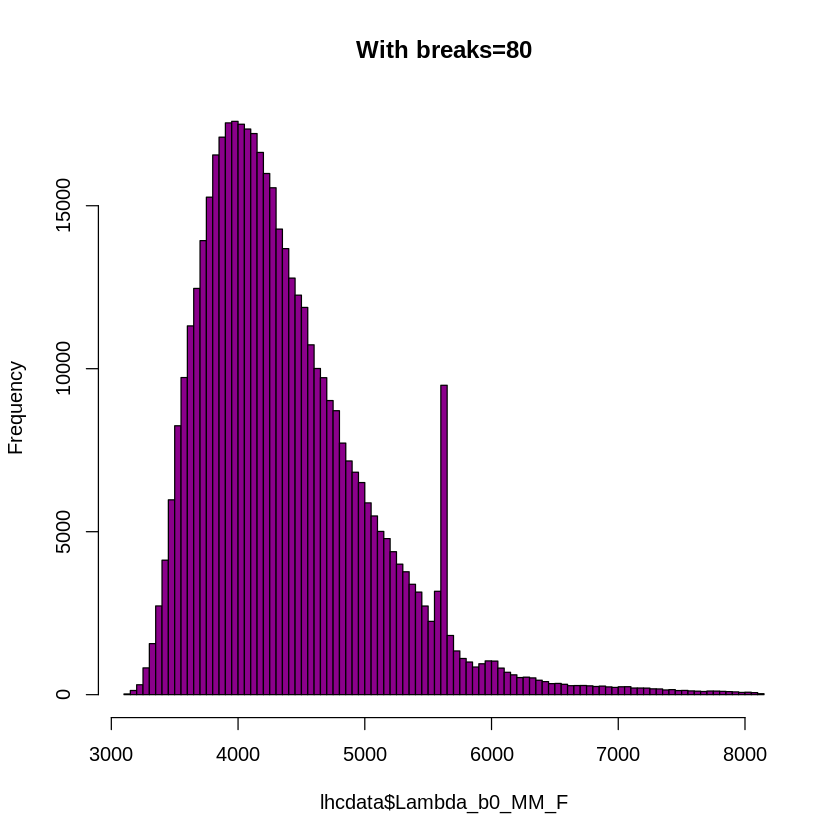

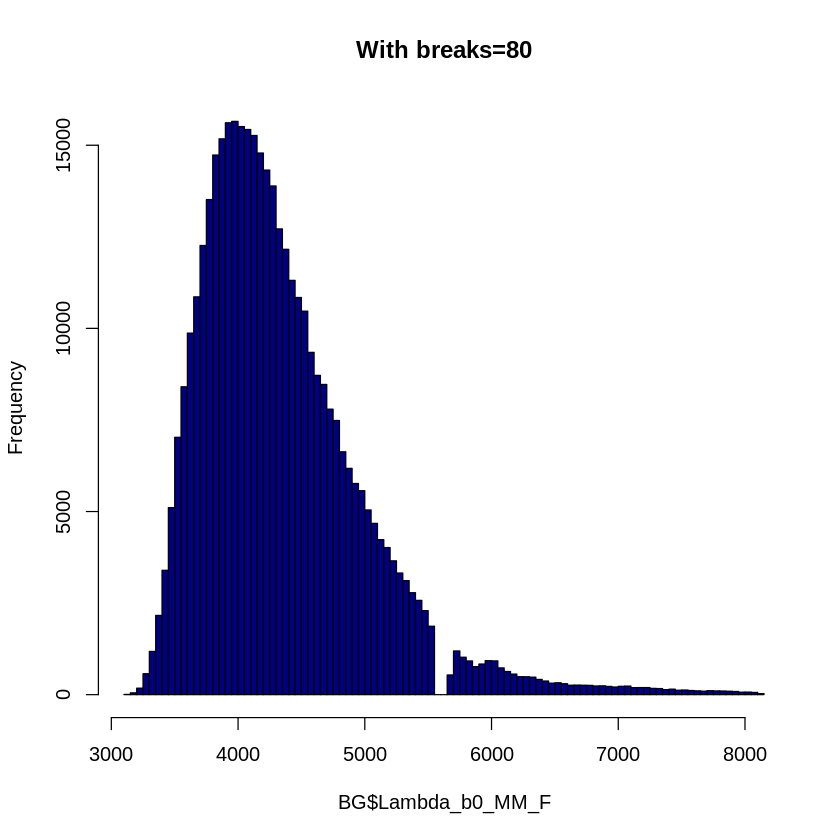

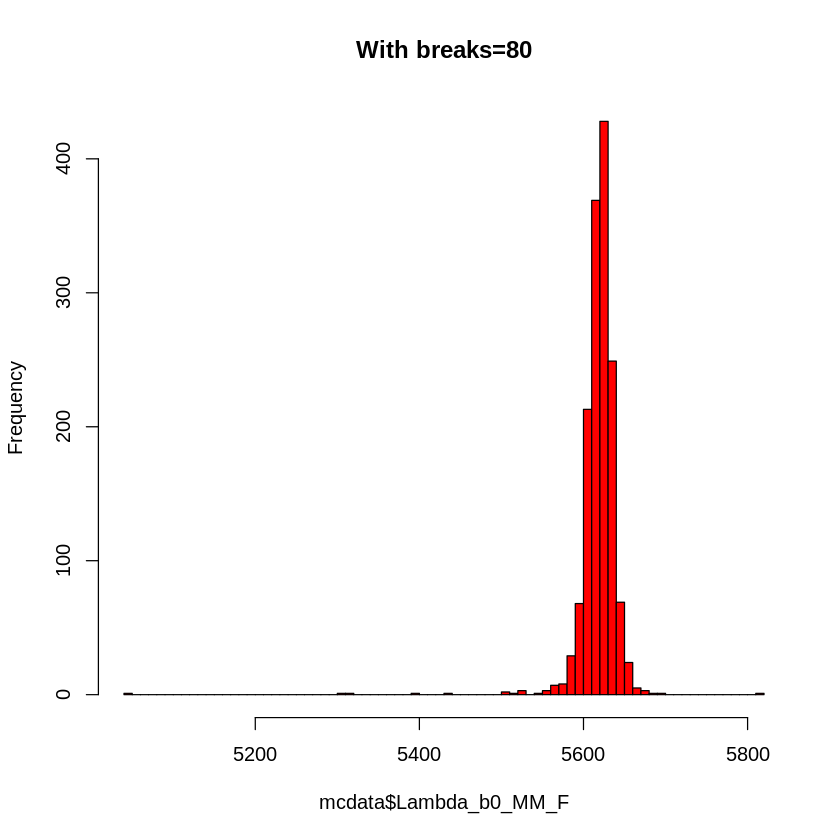

In [ ]:
Lb0mmF = lhcdata$Lambda_b0_MM_F
hist(lhcdata$Lambda_b0_MM_F, breaks=80, main="With breaks=80", col="darkmagenta")
hist(BG$Lambda_b0_MM_F, breaks=80, main="With breaks=80", col="navy")
hist(mcdata$Lambda_b0_MM_F, breaks=80, main="With breaks=80", col="red")

In [ ]:
library(data.table)

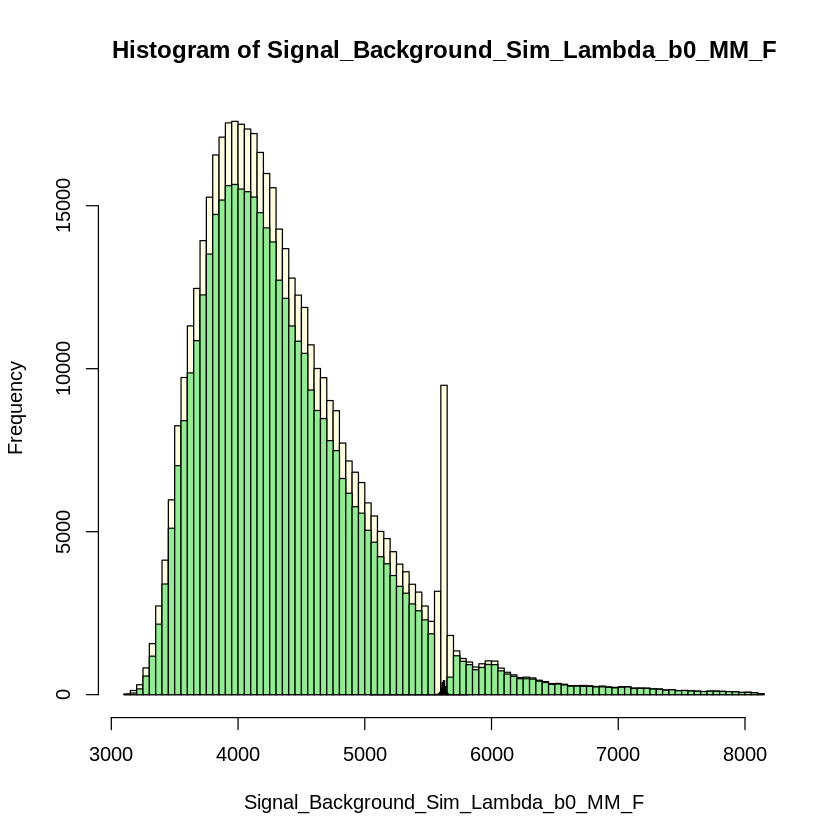

In [ ]:
Signal_Background_Sim_Lambda_b0_MM_F <- lhcdata$Lambda_b0_MM_F
lbmmf_Bac <- BG$Lambda_b0_MM_F
lbmmf_mc <- mcdata$Lambda_b0_MM_F
hist_Lsig <- hist(Signal_Background_Sim_Lambda_b0_MM_F, breaks = 80, plot = FALSE)
hist_Lbac <- hist(lbmmf_Bac, breaks = 80, plot = FALSE)
hist_Lmc <- hist(lbmmf_mc, breaks = 80, plot = FALSE)
plot(hist_Lsig, col = 'lightyellow')
plot(hist_Lbac, col = 'lightgreen', add = TRUE)
plot(hist_Lmc, col = 'red', add = TRUE)

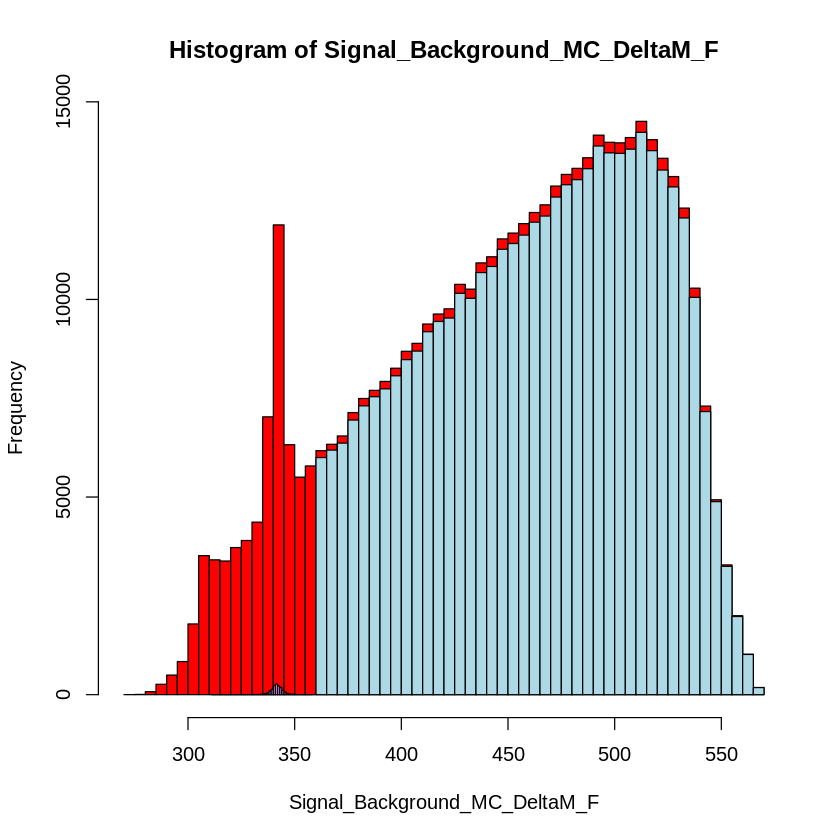

In [ ]:
Signal_Background_MC_DeltaM_F <- lhcdata$DeltaM_F
delM_Bac <- BG$DeltaM_F
delM_mc <- mcdata$DeltaM_F
hist_MMsig <- hist(Signal_Background_MC_DeltaM_F, breaks = 50, plot = FALSE)
hist_MMbac <- hist(delM_Bac, breaks = 50, plot = FALSE)
hist_MMmc <- hist(delM_mc, breaks = 50, plot = FALSE)
plot(hist_MMsig, col = 'red')
plot(hist_MMbac, col = 'lightblue', add = TRUE)
plot(hist_MMmc, col = 'violet', add = TRUE)


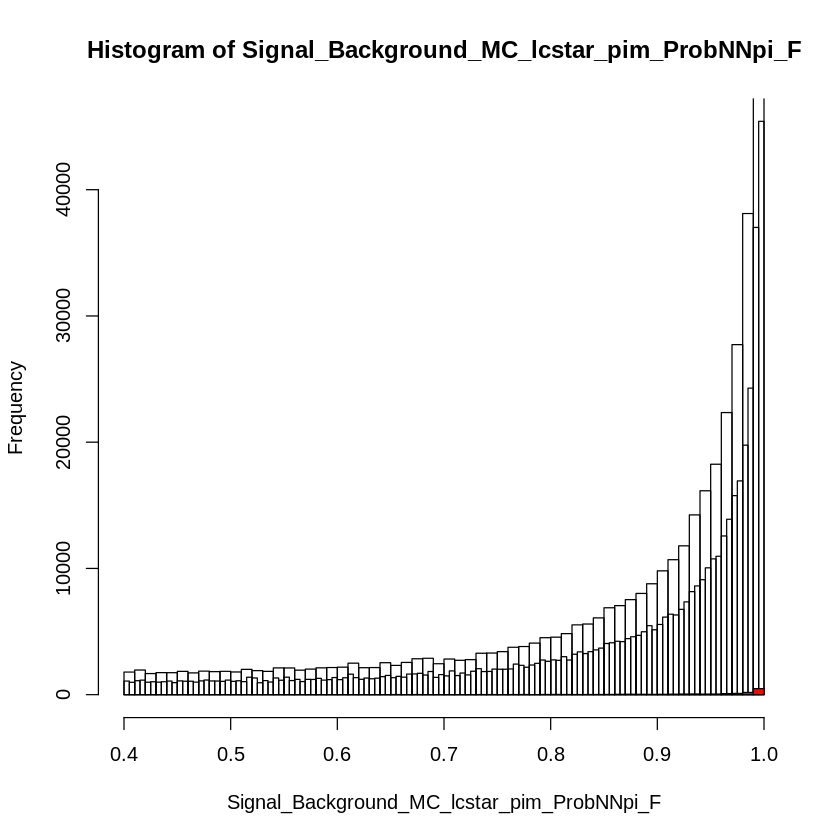

In [ ]:
Signal_Background_MC_lcstar_pim_ProbNNpi_F <- lhcdata$lcstar_pim_ProbNNpi_F
lbmmf_Bac <- BG$lcstar_pim_ProbNNpi_F
lbmmf_mc <- mcdata$lcstar_pim_ProbNNpi_F
hist_Icht_sig <- hist(Signal_Background_MC_lcstar_pim_ProbNNpi_F, breaks = 90, plot = FALSE)
hist_Icht_bac <- hist(lbmmf_Bac, breaks = 80, plot = FALSE)
hist_Icht_mc <- hist(lbmmf_mc, breaks = 80, plot = FALSE)
plot(hist_Icht_sig)
plot(hist_Icht_bac, add = TRUE)
plot(hist_Icht_mc, col = 'red', add = TRUE)



Warning message in plot.window(xlim, ylim, "", ...):
“"col.bg" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"col.bg" is not a graphical parameter”
Warning message in axis(1, ...):
“"col.bg" is not a graphical parameter”
Warning message in axis(2, ...):
“"col.bg" is not a graphical parameter”


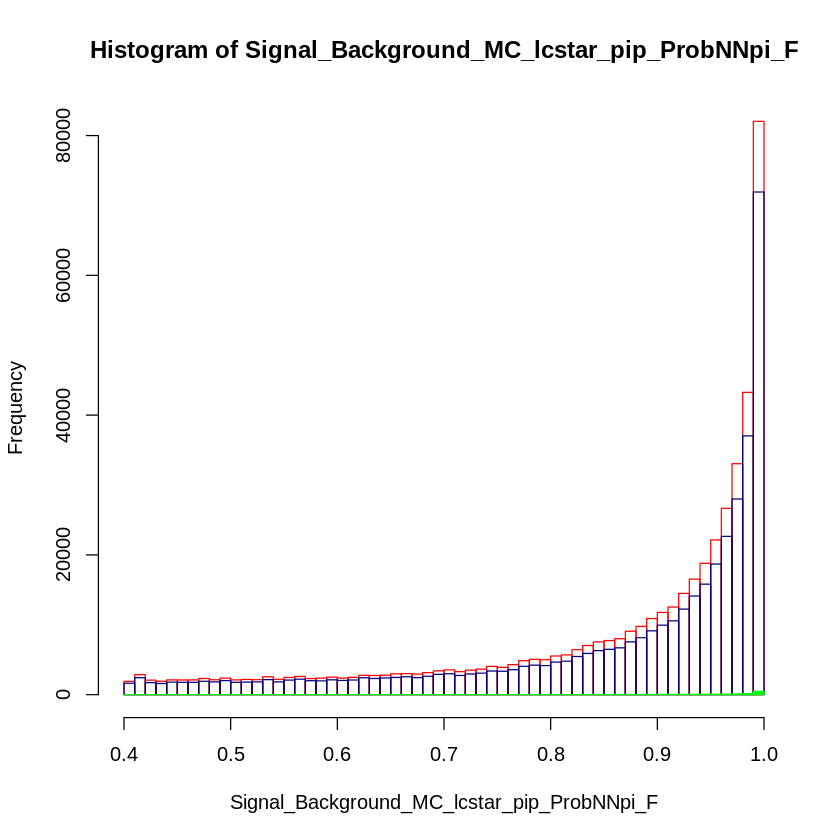

In [ ]:
Signal_Background_MC_lcstar_pip_ProbNNpi_F <- lhcdata$lcstar_pip_ProbNNpi_F
lbmmf_Bac <- BG$lcstar_pip_ProbNNpi_F
lbmmf_mc <- mcdata$lcstar_pip_ProbNNpi_F
hist_sig <- hist(Signal_Background_MC_lcstar_pip_ProbNNpi_F, breaks = 70, plot = FALSE)
hist__bac <- hist(lbmmf_Bac, breaks = 70, plot = FALSE)
hist__mc <- hist(lbmmf_mc, breaks = 70, plot = FALSE)
plot(hist_sig, col.bg="ivory", border="red")
plot(hist__bac, add = TRUE,border="navy")
plot(hist__mc, col = 'green', add = TRUE, border="green")



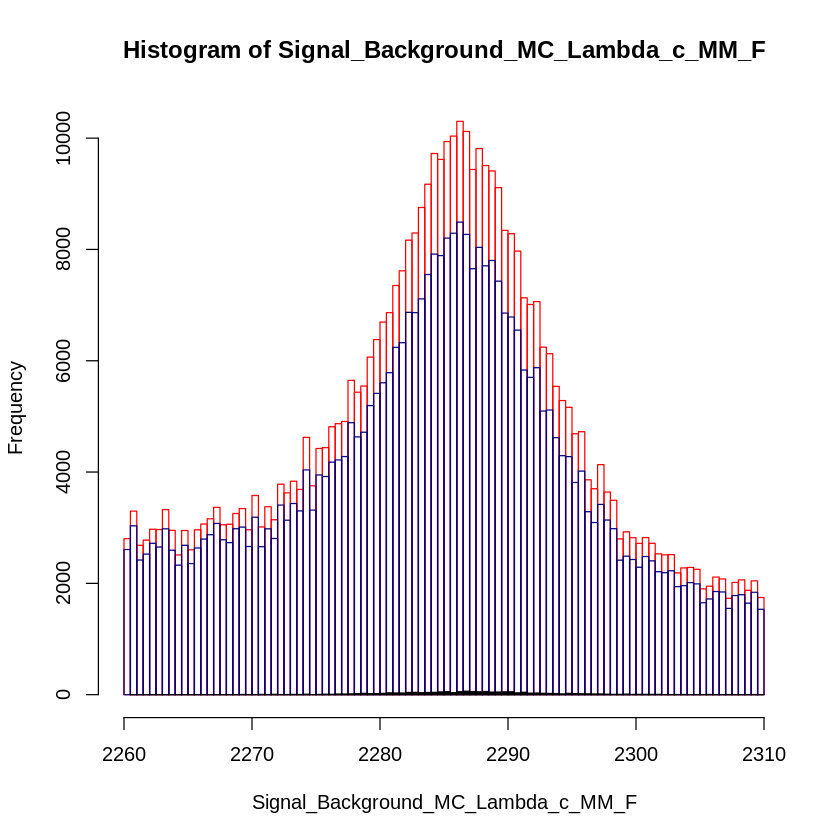

In [ ]:
Signal_Background_MC_Lambda_c_MM_F <- lhcdata$Lambda_c_MM_F
lbmmf_Bac <- BG$Lambda_c_MM_F
lbmmf_mc <- mcdata$Lambda_c_MM_F
hist_sig <- hist(Signal_Background_MC_Lambda_c_MM_F, breaks = 90, plot = FALSE)
hist__bac <- hist(lbmmf_Bac, breaks = 90, plot = FALSE)
hist__mc <- hist(lbmmf_mc, breaks = 90, plot = FALSE)
plot(hist_sig, border="red")
plot(hist__bac, add = TRUE,border="navy")
plot(hist__mc, col = 'black', add = TRUE, border="black")

In [ ]:
bind_rows(lhcdata,BG) -> df_pre
Rows <- sample(nrow(df_pre))

In [ ]:
df <- df_pre[Rows, ]

In [ ]:
df <- df_pre[Rows, ]

In [ ]:
# for promo
df_pre[Rows, ] -> Lambdabraredecay

In [ ]:
df

Lambda_b0_MM_F Lambda_b0_DIRA_OWNPV_F Lambda_c_MM_F DeltaM_F
698330 4561.499       0.9999936              2292.003      523.5098
336116 5359.549       0.9999965              2288.225      461.6927
441428 4129.635       0.9999901              2271.269      414.7212
619993 4155.771       0.9999902              2300.746      483.0427
98049  4098.246       0.9999917              2283.525      306.4905
374646 4127.113       0.9999977              2284.398      496.3093
556309 4361.062       0.9999934              2301.642      512.2949
22392  3686.913       0.9999955              2297.674      405.2309
157156 3837.811       0.9999998              2275.694      526.7838
602256 5129.013       0.9999955              2277.813      527.3245
833754 4013.560       0.9999978              2279.900      521.9614
133478 5028.556       0.9999983              2279.515      515.3558
341653 5211.304       0.9999923              2261.998      460.2148
139578 3820.034       0.9999972              2272.517      525.7994
642264 4534.695       0.9999984              2284.189      395.9419
181267 4534.523       0.9999949              2288.427      484.4058
449115 3698.211       0.9999968              2263.238      546.0739
687023 4119.036       0.9999979              2308.675      447.2513
739864 3998.630       0.9999971              2263.935      437.9274
211383 4813.936       0.9999905              2285.140      536.8423
323942 4494.056       0.9999907              2280.938      421.7151
542902 4806.628       0.9999927              2264.550      545.7974
18913  4393.975       0.9999967              2285.508      438.1973
135759 4137.855       0.9999955              2267.699      530.6488
693655 4225.602       0.9999994              2284.816      465.3338
873164 3861.922       0.9999919              2308.198      498.8224
795857 3554.359       0.9999902              2304.654      520.2150
25552  6148.376       0.9999969              2297.331      333.8791
70206  3922.326       0.9999995              2299.354      508.4139
538360 3809.816       0.9999949              2290.814      398.6999
⋮      ⋮              ⋮                      ⋮             ⋮       
568341 4543.487       0.9999924              2283.009      518.0983
93219  3896.249       0.9999968              2289.702      445.1983
575428 5533.011       0.9999994              2284.567      519.1872
397592 5503.847       0.9999976              2293.023      340.9869
629391 5437.302       0.9999911              2285.802      447.8172
645754 4481.441       0.9999960              2291.845      461.9912
665772 3840.143       0.9999982              2309.459      366.7139
114882 3542.587       0.9999936              2299.914      515.1495
803955 3544.778       0.9999938              2282.502      434.6087
190931 4311.322       0.9999917              2277.588      542.6687
772628 4264.223       0.9999900              2306.134      460.3105
859270 4239.391       0.9999983              2280.102      525.2003
406293 5002.112       0.9999976              2286.321      427.9306
758365 3911.926       0.9999992              2308.622      401.4217
312188 4069.801       0.9999968              2286.632      341.6016
125680 3509.333       0.9999936              2279.054      462.3019
295376 3855.315       0.9999913              2283.795      470.0447
305457 4418.898       0.9999960              2283.727      502.5364
653345 3691.540       0.9999984              2267.627      550.3627
299410 4658.830       0.9999973              2297.421      433.8605
261125 3726.424       0.9999917              2287.331      530.4426
228410 3931.624       0.9999985              2285.497      469.7369
537784 4162.763       1.0000000              2273.462      418.0038
829361 4456.211       0.9999937              2291.680      493.6465
412085 3919.762       0.9999980              2277.076      491.5745
4014   4939.718       0.9999950              2298.637      427.0925
773043 4016.886       0.9999968              2279.348      490.

In [ ]:
set.seed(13)
train_test_split = initial_split(df, prop = 0.8)
train_df = training(train_test_split)
test_df = testing(train_test_split)

In [ ]:
rec_obj <- recipe(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ ., data = train_df) %>%
step_dummy(all_nominal(), -all_outcomes()) %>%
step_center(all_predictors(), -all_outcomes()) %>%
step_scale(all_predictors(), -all_outcomes())  %>%
prep(data = train_df)

In [ ]:
rec_obj

Data Recipe

Inputs:

      role #variables
   outcome          4
 predictor          9

Training data contained 701919 data points and no missing data.

Operations:

Dummy variables from tagg [trained]
Centering for lcDecVerChi2_F, ... [trained]
Scaling for lcDecVerChi2_F, ... [trained]

In [ ]:
x_train_df = bake(rec_obj, train_df) %>% select(-Lambda_b0_MM_F , -Lambda_b0_DIRA_OWNPV_F, -Lambda_c_MM_F, -DeltaM_F)
x_test_df  = bake(rec_obj, test_df) %>% select(-Lambda_b0_MM_F , -Lambda_b0_DIRA_OWNPV_F, -Lambda_c_MM_F, -DeltaM_F)
glimpse(x_train_df)

Rows: 701,919
Columns: 9
$ lcDecVerChi2_F        <dbl> -0.2461310, -0.5058743, -0.4738295, 0.5016831, …
$ lcstarDecVerChi2_F    <dbl> 1.83111747, -1.10744936, 1.83911638, -0.7949147…
$ lbDecVerChi2_F        <dbl> 0.5362773, -0.3266817, 0.3651828, -0.0655579, -…
$ tau_pion0_ProbNNpi_F  <dbl> -0.78588948, -0.45490424, 0.57832862, 0.6376980…
$ tau_pion1_ProbNNpi_F  <dbl> 0.67501044, -0.10353552, -0.12332010, 0.5740064…
$ tau_pion2_ProbNNpi_F  <dbl> 0.06038525, 0.72506167, -1.13324170, 0.66259458…
$ lcstar_pim_ProbNNpi_F <dbl> 0.78982561, -0.51773160, -0.13349459, -0.042586…
$ lcstar_pip_ProbNNpi_F <dbl> 0.26473505, 0.60595119, 0.38698402, 0.67398365,…
$ tagg_s                <dbl> -1.0843321, 0.9222253, 0.9222253, 0.9222253, -1…


In [ ]:
y_train <- ifelse(pull(train_df,DeltaM_F)>360, 1,0)
y_test <-  ifelse(pull(test_df,DeltaM_F)>360, 1,0)

In [ ]:
y_train <- ifelse(pull(train_df,tagg) == "s", 1,0)
y_test <-  ifelse(pull(test_df, tagg) == "s", 1,0)

In [ ]:
y_test

[1] 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0
   [37] 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0
   [73] 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1
  [109] 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
  [145] 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0
  [181] 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0
  [217] 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1
  [253] 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0
  [289] 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
  [325] 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1
  [361] 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1
  [397] 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1
  [433] 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1
  [469] 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1
  [505] 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1
  [541] 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1
  [577] 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0
  [613] 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0
  [649] 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1
  [685] 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1
  [721] 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1
  [757] 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0
  [793] 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0
  [829] 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1
  [865] 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0
  [901] 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0
  [937] 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1
  [973] 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0
 [1009] 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0
 [1045] 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1
 [1081] 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 [1117] 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 [1153] 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1
 [1189] 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1
 [1225] 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1
 [1261] 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1
 [1297] 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1
 [1333] 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 [1369] 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 [1405] 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 [1441] 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1
 [1477] 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0
 [1513] 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1
 [1549] 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0
 [1585] 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 [1621] 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0
 [1657] 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 [1693] 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1
 [1729] 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 [1765] 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1
 [18

## ANN

In [ ]:
model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 20,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 1,
    kernel_initializer = 'uniform',
    activation = "relu") %>%

compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model

function (inputs, outputs = NULL) 
{
    keras$models$Model(inputs = unname(inputs), outputs = unname(outputs))
}
<bytecode: 0x55b3dd89a200>
<environment: namespace:keras>

## Fitting


Final epoch (plot to see history):
        loss: 0.2088
    accuracy: 0.9291
    val_loss: 0.2079
val_accuracy: 0.9295 

`geom_smooth()` using formula 'y ~ x'



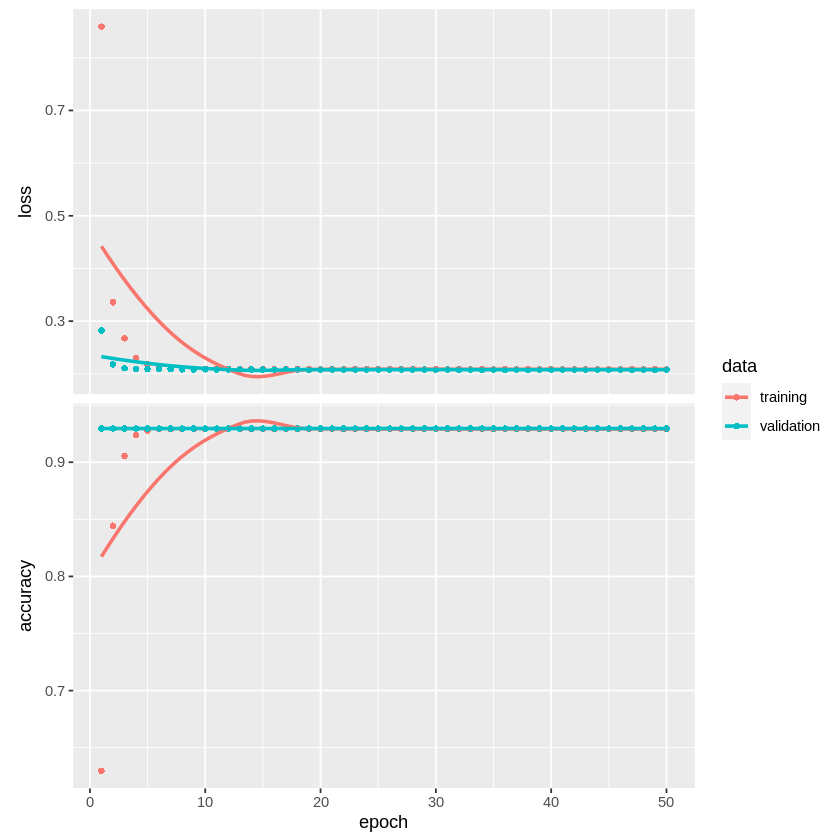

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 300,
    epochs = 50,
    validation_split = 0.20
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()

In [ ]:
yhat_keras_prob_vec

In [ ]:
estimate_keras_Decay = tibble(truth = as.factor(y_test) %>% fct_recode(s = '1', B = '0'),
                              estimte = as.factor(yhat_keras_class_vec) %>% fct_recode(s = '1', B = '0'),
                              class_prob = yhat_keras_prob_vec)

Warning message:
“Unknown levels in `f`: 1”
Warning message:
“Unknown levels in `f`: 0”


In [ ]:
estimate_keras_Decay
options(yardstick.event_first = TRUE)

truth estimte class_prob
1      B     s       0.9059511 
2      B     s       0.8911239 
3      B     s       1.3576409 
4      B     s       0.8825569 
5      B     s       1.3591206 
6      B     s       0.8874777 
7      B     s       1.3487065 
8      B     s       0.8581979 
9      B     s       0.8407802 
10     B     s       0.9012350 
11     B     s       0.8796663 
12     B     s       0.8822732 
13     B     s       1.3695010 
14     B     s       0.9023922 
15     B     s       0.8992990 
16     B     s       0.8369919 
17     B     s       1.3529673 
18     B     s       0.8670652 
19     B     s       1.3622926 
20     B     s       1.3682016 
21     B     s       0.8823433 
22     B     s       1.3735771 
23     B     s       0.8705822 
24     B     s       1.3622676 
25     B     s       0.8791317 
26     B     s       0.9047212 
27     B     s       0.8622090 
28     B     s       0.8884538 
29     B     s       1.3566632 
30     B     s       0.8532395 
⋮      ⋮     ⋮       ⋮         
175450 B     s       0.8505239 
175451 B     s       0.8861122 
175452 B     s       0.8910639 
175453 B     s       0.8913903 
175454 B     s       0.8549716 
175455 B     s       1.3563268 
175456 B     s       1.3489342 
175457 B     s       1.3664821 
175458 B     s       0.8920703 
175459 B     s       0.8990162 
175460 B     s       1.3719174 
175461 B     s       0.8549548 
175462 B     s       1.3643218 
175463 B     s       1.3618708 
175464 B     s       1.3726099 
175465 B     s       0.9045519 
175466 B     s       1.3579239 
175467 B     s       1.3632900 
175468 B     s       1.3435205 
175469 B     s       1.3537285 
175470 B     s       1.3648839 
175471 B     s       1.3717374 
175472 B     s       0.8410171 
175473 B     s       1.3473294 
175474 B     s       0.9047647 
175475 B     s       1.3662524 
175476 B     s       1.3620956 
175477 B     s       1.3685968 
175478 B     s       1.3599987 
175479 B     s       1.3546888

In [ ]:
x_test_df

In [ ]:
# Second try
model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 20,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 1,
    kernel_initializer = 'uniform',
    activation = "relu") %>%

compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model

function (inputs, outputs = NULL) 
{
    keras$models$Model(inputs = unname(inputs), outputs = unname(outputs))
}
<bytecode: 0x55b3dd89a200>
<environment: namespace:keras>


Final epoch (plot to see history):
        loss: 0
    accuracy: 1
    val_loss: 0
val_accuracy: 1 

`geom_smooth()` using formula 'y ~ x'



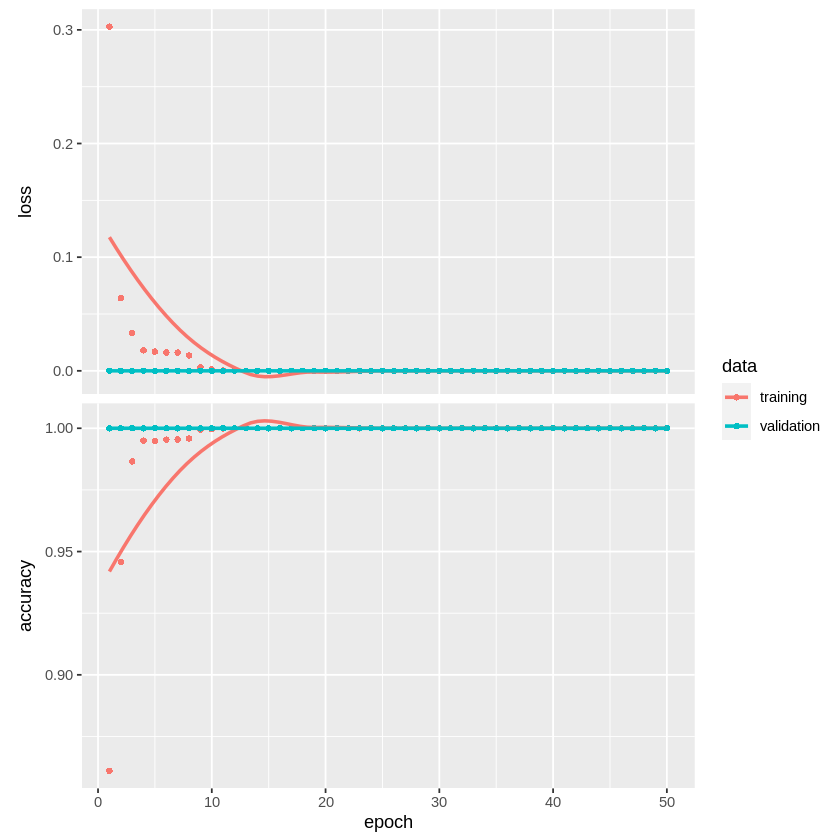

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 300,
    epochs = 50,
    validation_split = 0.20
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()


estimate_keras_Decay = tibble(truth = as.factor(y_test) %>% fct_recode(s = '1', B = '0'),
                              estimte = as.factor(yhat_keras_class_vec) %>% fct_recode(s = '1', B = '0'),
                              class_prob = yhat_keras_prob_vec)

In [ ]:
estimate_keras_Decay
options(yardstick.event_first = TRUE)

truth estimte class_prob
1      s     s       1.315389  
2      s     s       1.315389  
3      B     B       0.000000  
4      s     s       1.315389  
5      B     B       0.000000  
6      s     s       1.315389  
7      B     B       0.000000  
8      s     s       1.315389  
9      s     s       1.315389  
10     s     s       1.315389  
11     s     s       1.315389  
12     s     s       1.315389  
13     B     B       0.000000  
14     s     s       1.315389  
15     s     s       1.315389  
16     s     s       1.315389  
17     B     B       0.000000  
18     s     s       1.315389  
19     B     B       0.000000  
20     B     B       0.000000  
21     s     s       1.315389  
22     B     B       0.000000  
23     s     s       1.315389  
24     B     B       0.000000  
25     s     s       1.315389  
26     s     s       1.315389  
27     s     s       1.315389  
28     s     s       1.315389  
29     B     B       0.000000  
30     s     s       1.315389  
⋮      ⋮     ⋮       ⋮         
175450 s     s       1.315389  
175451 s     s       1.315389  
175452 s     s       1.315389  
175453 s     s       1.315389  
175454 s     s       1.315389  
175455 B     B       0.000000  
175456 B     B       0.000000  
175457 B     B       0.000000  
175458 s     s       1.315389  
175459 s     s       1.315389  
175460 B     B       0.000000  
175461 s     s       1.315389  
175462 B     B       0.000000  
175463 B     B       0.000000  
175464 B     B       0.000000  
175465 s     s       1.315389  
175466 B     B       0.000000  
175467 B     B       0.000000  
175468 B     B       0.000000  
175469 B     B       0.000000  
175470 B     B       0.000000  
175471 B     B       0.000000  
175472 s     s       1.315389  
175473 B     B       0.000000  
175474 s     s       1.315389  
175475 B     B       0.000000  
175476 B     B       0.000000  
175477 B     B       0.000000  
175478 B     B       0.000000  
175479 B     B       0.000000

In [ ]:
# Third Try

model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 20,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 4,
    kernel_initializer = 'uniform',
    activation = "relu") %>%

compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model

function (inputs, outputs = NULL) 
{
    keras$models$Model(inputs = unname(inputs), outputs = unname(outputs))
}
<bytecode: 0x55b3dd89a200>
<environment: namespace:keras>


Final epoch (plot to see history):
        loss: 0.2087
    accuracy: 0.1739
    val_loss: 0.2077
val_accuracy: 0.181 

`geom_smooth()` using formula 'y ~ x'



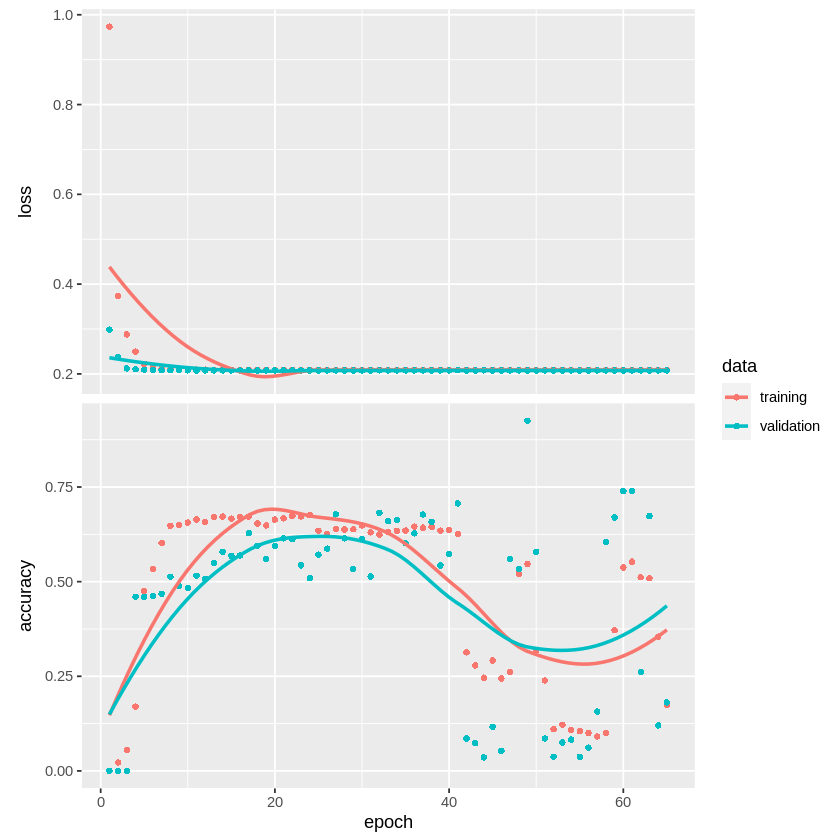

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 300,
    epochs = 65,
    validation_split = 0.25
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()


estimate_keras_Decay = tibble(truth = as.factor(y_test) %>% fct_recode(s = '1', B = '0'),
                              estimte = as.factor(yhat_keras_class_vec) %>% fct_recode(s = '1', B = '0'),
                              class_prob = yhat_keras_prob_vec)





In [ ]:
estimate_keras_Decay
options(yardstick.event_first = FALSE)

In [ ]:
model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 20,
    kernel_initializer = 'he_uniform',
    activation = "relu") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 20,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 4,
    kernel_initializer = 'uniform',
    activation = "relu") %>%

compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 300,
    epochs = 85,
    validation_split = 0.10
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()






In [ ]:
estimate_keras_Decay = tibble(truth = as.factor(y_train) %>% fct_recode(s = '1', B = '0'),
                              estimte = as.factor(yhat_keras_class_vec) %>% fct_recode(s = '1', B = '0'),class_prob = yhat_keras_prob_vec)

In [ ]:
estimate_keras_Decay
#options(yardstick.event_first = TRUE)

In [ ]:
RowZ <- nrow(x_test_df)

In [ ]:
BG_test %>% BG[RowZ,] %>% select(-Lambda_b0_MM_F , -Lambda_b0_DIRA_OWNPV_F, -Lambda_c_MM_F, -DeltaM_F)
glimpse(BG_test)

ERROR: ignored

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(BG_test)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(BG_test)) %>% as.vector()


estimate_keras_Decay = tibble(truth = as.factor(y_test) %>% fct_recode(s = '1', B = '0'),
                              estimte = as.factor(yhat_keras_class_vec) %>% fct_recode(s = '1', B = '0'),
                              class_prob = yhat_keras_prob_vec)

estimate_keras_Decay
options(yardstick.event_first = TRUE)



ERROR: ignored

In [ ]:
print("========================")

In [ ]:
model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 90,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 100,
    kernel_initializer = 'he_uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 120,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%
# 4th HL
layer_dense(
    units = 40,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 1,
    kernel_initializer = 'he_uniform',
    activation = "softmax") %>%

compile(
    optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model


function (inputs, outputs = NULL) 
{
    keras$models$Model(inputs = unname(inputs), outputs = unname(outputs))
}
<bytecode: 0x55b3dd89a200>
<environment: namespace:keras>


Final epoch (plot to see history):
        loss: 7.012
    accuracy: 0.5402
    val_loss: 6.977
val_accuracy: 0.5424 

`geom_smooth()` using formula 'y ~ x'



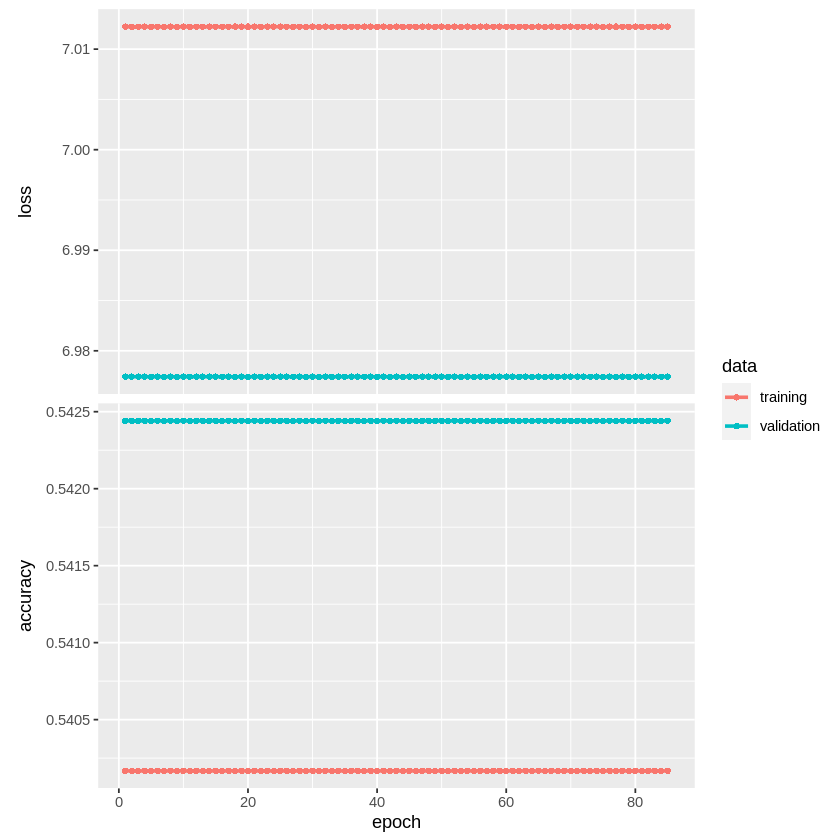

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 330,
    epochs = 85,
    validation_split = 0.10
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()





In [ ]:
estimate_keras_Decay = tibble(truth = as.factor(y_test) %>% fct_recode(s = '1', B = '0'),
                              estimte = as.factor(yhat_keras_class_vec) %>% fct_recode(s = '1', B = '0'),
                              class_prob = yhat_keras_prob_vec)



Warning message:
“Unknown levels in `f`: 0”


In [ ]:
estimate_keras_Decay

truth estimte class_prob
1      s     s       1         
2      s     s       1         
3      B     s       1         
4      s     s       1         
5      B     s       1         
6      s     s       1         
7      B     s       1         
8      s     s       1         
9      s     s       1         
10     s     s       1         
11     s     s       1         
12     s     s       1         
13     B     s       1         
14     s     s       1         
15     s     s       1         
16     s     s       1         
17     B     s       1         
18     s     s       1         
19     B     s       1         
20     B     s       1         
21     s     s       1         
22     B     s       1         
23     s     s       1         
24     B     s       1         
25     s     s       1         
26     s     s       1         
27     s     s       1         
28     s     s       1         
29     B     s       1         
30     s     s       1         
⋮      ⋮     ⋮       ⋮         
175450 s     s       1         
175451 s     s       1         
175452 s     s       1         
175453 s     s       1         
175454 s     s       1         
175455 B     s       1         
175456 B     s       1         
175457 B     s       1         
175458 s     s       1         
175459 s     s       1         
175460 B     s       1         
175461 s     s       1         
175462 B     s       1         
175463 B     s       1         
175464 B     s       1         
175465 s     s       1         
175466 B     s       1         
175467 B     s       1         
175468 B     s       1         
175469 B     s       1         
175470 B     s       1         
175471 B     s       1         
175472 s     s       1         
175473 B     s       1         
175474 s     s       1         
175475 B     s       1         
175476 B     s       1         
175477 B     s       1         
175478 B     s       1         
175479 B     s       1

In [ ]:
y_train <- ifelse(pull(train_df,DeltaM_F)>360, 1,0)
y_test <-  ifelse(pull(test_df,DeltaM_F)>360, 1,0)

In [ ]:
model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 90,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 90,
    kernel_initializer = 'he_uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 110,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%
# 4th HL
layer_dense(
    units = 40,
    kernel_initializer = 'uniform',
    activation = "relu") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 1,
    kernel_initializer = 'he_uniform',
    activation = "softmax") %>%

compile(
    optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model


function (inputs, outputs = NULL) 
{
    keras$models$Model(inputs = unname(inputs), outputs = unname(outputs))
}
<bytecode: 0x55b3dd89a200>
<environment: namespace:keras>


Final epoch (plot to see history):
        loss: 7.01
    accuracy: 0.5403
    val_loss: 7.003
val_accuracy: 0.5408 

`geom_smooth()` using formula 'y ~ x'



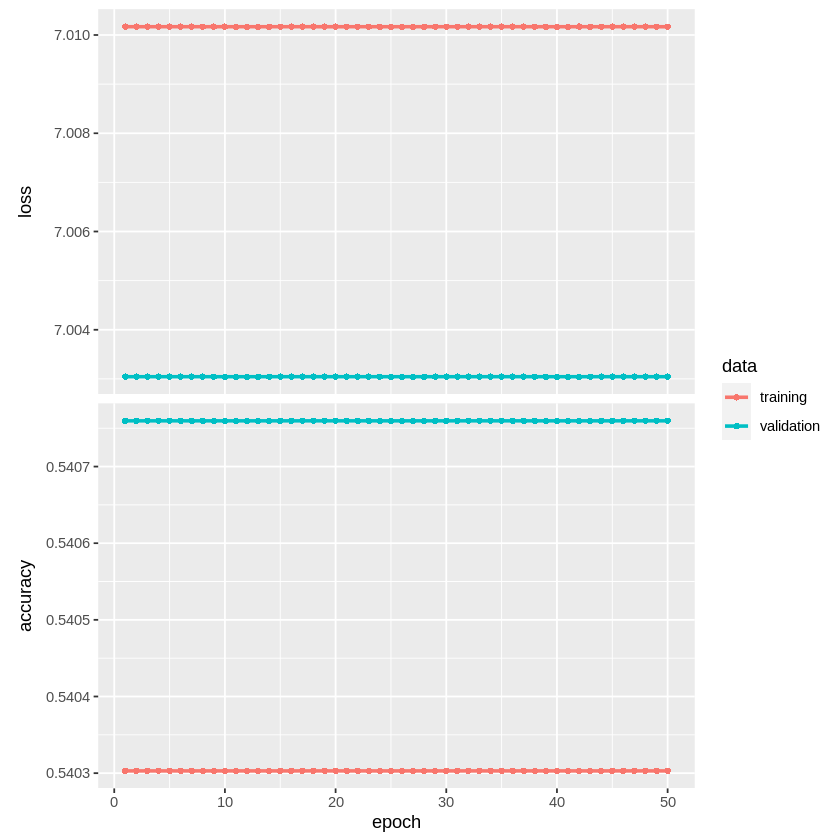

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 300,
    epochs = 50,
    validation_split = 0.20
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()






In [ ]:
estimate_keras_Decay
options(yardstick.event_first = FALSE)

truth estimte class_prob
1      s     s       1         
2      s     s       1         
3      B     s       1         
4      s     s       1         
5      B     s       1         
6      s     s       1         
7      B     s       1         
8      s     s       1         
9      s     s       1         
10     s     s       1         
11     s     s       1         
12     s     s       1         
13     B     s       1         
14     s     s       1         
15     s     s       1         
16     s     s       1         
17     B     s       1         
18     s     s       1         
19     B     s       1         
20     B     s       1         
21     s     s       1         
22     B     s       1         
23     s     s       1         
24     B     s       1         
25     s     s       1         
26     s     s       1         
27     s     s       1         
28     s     s       1         
29     B     s       1         
30     s     s       1         
⋮      ⋮     ⋮       ⋮         
175450 s     s       1         
175451 s     s       1         
175452 s     s       1         
175453 s     s       1         
175454 s     s       1         
175455 B     s       1         
175456 B     s       1         
175457 B     s       1         
175458 s     s       1         
175459 s     s       1         
175460 B     s       1         
175461 s     s       1         
175462 B     s       1         
175463 B     s       1         
175464 B     s       1         
175465 s     s       1         
175466 B     s       1         
175467 B     s       1         
175468 B     s       1         
175469 B     s       1         
175470 B     s       1         
175471 B     s       1         
175472 s     s       1         
175473 B     s       1         
175474 s     s       1         
175475 B     s       1         
175476 B     s       1         
175477 B     s       1         
175478 B     s       1         
175479 B     s       1

In [ ]:
print("++++++++++++++++===============++++++++++++++++===============")

[1] "++++++++++++++++===============++++++++++++++++==============="


In [ ]:
set.seed(13)
train_test_split = initial_split(df, prop = 0.95)
train_df = training(train_test_split)
test_df = testing(train_test_split)

In [ ]:
x_train_df = bake(rec_obj, train_df) %>% select(-tagg)
x_test_df  = bake(rec_obj, test_df) %>% select(-tagg)
glimpse(x_train_df)

In [ ]:
y_train <- ifelse(pull(train_df,tagg) == "s", 1,0)
y_test <-  ifelse(pull(test_df, tagg) == "s", 1,0)

In [ ]:
model_keras = keras_model_sequential()

model_keras %>%
# 1th Hidden Layer
layer_dense(
    units = 80,
    kernel_initializer = 'he_uniform',
    activation = "relu",
    input_shape = ncol(x_train_df)) %>%
layer_dropout(rate = 0.1) %>%

# 2nd hidden layer
layer_dense(
    units = 120,
    kernel_initializer = 'he_uniform',
    activation = "relu") %>%
layer_dropout(rate = 0.1) %>%
    
# 3rd HL
layer_dense(
    units = 100,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%
# 4th HL
layer_dense(
    units = 60,
    kernel_initializer = 'uniform',
    activation = "softmax") %>%
layer_dropout(rate = 0.1) %>%

# outter
layer_dense(
    units = 1,
    kernel_initializer = 'uniform',
    activation = "sigmoid") %>%

compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = c('accuracy')
    )
keras_model

function (inputs, outputs = NULL) 
{
    keras$models$Model(inputs = unname(inputs), outputs = unname(outputs))
}
<bytecode: 0x55b3dd89a200>
<environment: namespace:keras>


Final epoch (plot to see history):
        loss: 0.06911
    accuracy: 0.9538
    val_loss: 0.00000000885
val_accuracy: 1 

`geom_smooth()` using formula 'y ~ x'



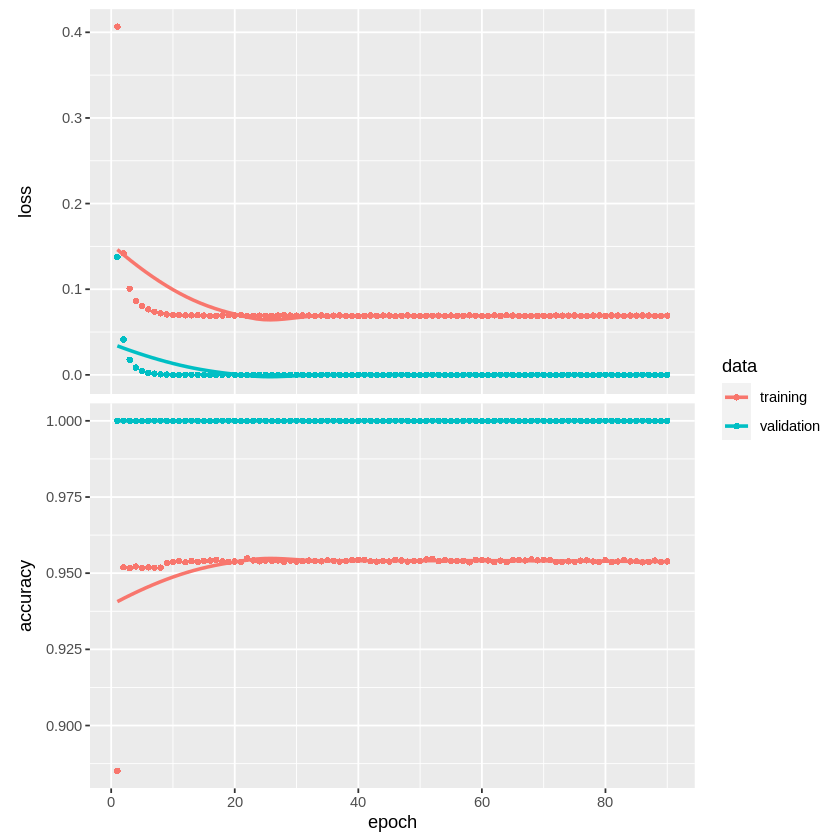

In [ ]:
Decay = fit(
    object = model_keras,
    x = as.matrix(x_train_df),
    y = y_train,
    batch_size = 350,
    epochs = 90,
    validation_split = 0.20
)
Decay

plot(Decay)

In [ ]:
# Predicted class
yhat_keras_class_vec = predict_classes(object = model_keras, x
                                       = as.matrix(x_test_df)) %>% as.vector()

# Predicted class probability
yhat_keras_prob_vec = predict_proba(object = model_keras, x = as.matrix(x_test_df)) %>% as.vector()






In [ ]:
estimate_keras_Decay
options(yardstick.event_first = FALSE)

truth estimte class_prob
1      s     s       1         
2      s     s       1         
3      B     s       1         
4      s     s       1         
5      B     s       1         
6      s     s       1         
7      B     s       1         
8      s     s       1         
9      s     s       1         
10     s     s       1         
11     s     s       1         
12     s     s       1         
13     B     s       1         
14     s     s       1         
15     s     s       1         
16     s     s       1         
17     B     s       1         
18     s     s       1         
19     B     s       1         
20     B     s       1         
21     s     s       1         
22     B     s       1         
23     s     s       1         
24     B     s       1         
25     s     s       1         
26     s     s       1         
27     s     s       1         
28     s     s       1         
29     B     s       1         
30     s     s       1         
⋮      ⋮     ⋮       ⋮         
175450 s     s       1         
175451 s     s       1         
175452 s     s       1         
175453 s     s       1         
175454 s     s       1         
175455 B     s       1         
175456 B     s       1         
175457 B     s       1         
175458 s     s       1         
175459 s     s       1         
175460 B     s       1         
175461 s     s       1         
175462 B     s       1         
175463 B     s       1         
175464 B     s       1         
175465 s     s       1         
175466 B     s       1         
175467 B     s       1         
175468 B     s       1         
175469 B     s       1         
175470 B     s       1         
175471 B     s       1         
175472 s     s       1         
175473 B     s       1         
175474 s     s       1         
175475 B     s       1         
175476 B     s       1         
175477 B     s       1         
175478 B     s       1         
175479 B     s       1

In [ ]:
mc

X    lcstar_MM_F Lambda_c_MM_F Lambda_b0_MM_F lc_p_ProbNNp_F
1     0   2626.854    2284.956      5622.924       0.9917341     
2     1   2627.802    2283.068      5612.167       0.8882393     
3     2   2633.442    2291.627      5616.046       0.9993977     
4     3   2642.915    2301.805      5646.397       0.8957078     
5     4   2622.908    2281.427      5611.077       0.8264728     
6     5   2621.799    2286.452      5620.596       0.9926847     
7     6   2633.752    2292.133      5631.278       0.9998189     
8     7   2618.666    2279.865      5604.264       0.9928729     
9     8   2622.643    2283.496      5610.208       0.9999013     
10    9   2626.097    2283.652      5621.746       0.9689334     
11   10   2636.364    2294.166      5631.855       0.6329386     
12   11   2626.407    2286.896      5627.645       0.9902087     
13   12   2627.606    2287.422      5618.892       0.8458005     
14   13   2633.644    2292.339      5630.185       0.9874167     
15   14   2628.740    2286.074      5614.960       0.9968805     
16   15   2633.040    2288.180      5628.792       0.9967936     
17   16   2623.601    2279.895      5609.347       0.9971652     
18   17   2626.214    2284.657      5625.520       0.9661064     
19   18   2633.104    2298.758      5622.241       0.9781937     
20   19   2622.333    2291.379      5606.616       0.9937553     
21   20   2617.862    2277.564      5603.439       0.6568693     
22   21   2621.673    2277.671      5619.521       0.9997976     
23   22   2636.457    2294.771      5645.582       0.7906193     
24   23   2627.944    2288.322      5619.412       0.6470486     
25   24   2627.915    2285.422      5607.987       0.9997674     
26   25   2621.512    2278.751      5599.928       0.9998551     
27   26   2636.082    2294.183      5622.429       0.9972211     
28   27   2632.979    2291.120      5625.628       0.9962320     
29   28   2624.858    2287.099      5605.912       0.7583655     
30   29   2621.297    2280.140      5630.134       0.9926306     
⋮    ⋮    ⋮           ⋮             ⋮              ⋮             
1461 1460 2647.637    2297.957      5644.090       0.9801602     
1462 1461 2630.111    2288.634      5630.244       0.9998122     
1463 1462 2626.928    2282.649      5619.801       0.9991115     
1464 1463 2618.250    2276.949      5612.956       0.9988496     
1465 1464 2638.328    2297.079      5634.942       0.9999126     
1466 1465 2625.206    2282.178      5598.708       0.9999111     
1467 1466 2623.902    2291.092      5615.294       0.7326927     
1468 1467 2613.491    2273.333      5603.602       0.9953608     
1469 1468 2631.091    2289.422      5615.892       0.8068633     
1470 1469 2622.700    2280.177      5523.966       0.7794125     
1471 1470 2634.210    2293.231      5644.069       0.9790184     
1472 1471 2637.098    2295.384      5632.336       0.9119179     
1473 1472 2618.544    2284.510      5576.652       0.9998835     
1474 1473 2627.223    2286.960      5615.513       0.9997994     
1475 1474 2627.233    2286.640      5611.229       0.9991600     
1476 1475 2622.452    2281.914      5603.486       0.9963517     
1477 1476 2626.703    2289.768      5625.336       0.9999147     
1478 1477 2631.142    2287.678      5562.306       0.9653023     
1479 1478 2631.034    2291.015      5627.931       0.9975903     
1480 1479 2623.950    2281.058      5608.516       0.7474790     
1481 1480 2626.054    2284.840      5625.215       0.9982334     
1482 1481 2633.725    2291.441      5608.377       0.9965650     
1483 1482 2629.356    2287.776      5630.028       0.9833714     
1484 1483 2620.459    2282.135      5603.837       0.9706972     
1485 1484 2627.222    2282.957      5625.400       0.9932543     
1486 1485 2631.538    2288.190      5636.475       0.9248709     
1487 1486 2630.088    2284.417      5624.078       0.9992244     
1488 1487 2621.856    2283.615      5609.054       0.9738095     
1489 1488 2627.129    2284.547      5623.819 

In [ ]:
df <- test_df

In [ ]:
print("++++++++++++++++===============RF++++++++++++++++===============")

[1] "++++++++++++++++===============RF++++++++++++++++==============="


In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
dft <- df
dft <- as.data.frame(sapply(dft, function(x) gsub("\"", "", x)))
dft <- dft %>% select(tagg, Lambda_b0_MM_F, Lambda_b0_DIRA_OWNPV_F,Lambda_c_MM_F, DeltaM_F)

In [ ]:
dft$tagg <- as.factor(dft$tagg)
dft$Lambda_b0_MM_F <- as.factor(dft$Lambda_b0_MM_F)
dft$Lambda_b0_DIRA_OWNPV_F <- as.factor(dft$Lambda_b0_DIRA_OWNPV_F)
dft$Lambda_c_MM_F <- as.factor(dft$Lambda_c_MM_F)
dft$DeltaM_F <- as.factor(dft$DeltaM_F)

In [ ]:
dftt <- do.call(data.frame, dft)
dftt <- droplevels(dftt,all)
dfta <- dftt

ERROR: ignored

In [ ]:
dft <- df
dfk <- data.frame(dft$tagg, dft$Lambda_b0_MM_F, dft$Lambda_b0_DIRA_OWNPV_F, dft$Lambda_c_MM_F, dft$DeltaM_F)
dfk[, 2:5]

dft.Lambda_b0_MM_F dft.Lambda_b0_DIRA_OWNPV_F dft.Lambda_c_MM_F
1      4407.422           0.9999923                  2274.345         
2      5082.846           0.9999936                  2287.734         
3      4634.324           0.9999912                  2289.763         
4      4206.155           0.9999912                  2292.454         
5      3809.079           0.9999951                  2276.756         
6      3963.267           0.9999903                  2307.112         
7      4077.826           0.9999968                  2276.718         
8      4604.145           0.9999977                  2291.982         
9      4603.156           0.9999962                  2287.890         
10     3859.296           0.9999984                  2271.486         
11     3745.970           0.9999970                  2277.198         
12     4403.778           0.9999935                  2305.569         
13     4958.839           0.9999982                  2289.085         
14     4134.807           0.9999934                  2300.214         
15     3392.653           0.9999953                  2280.492         
16     3793.190           0.9999906                  2291.365         
17     3912.400           0.9999965                  2286.131         
18     4318.195           0.9999967                  2289.194         
19     3858.286           0.9999977                  2291.448         
20     3737.757           0.9999902                  2281.274         
21     4774.174           0.9999908                  2282.510         
22     4940.937           0.9999998                  2305.004         
23     4685.289           0.9999990                  2282.324         
24     4978.514           0.9999916                  2282.467         
25     4830.883           0.9999921                  2287.503         
26     4872.161           0.9999961                  2293.580         
27     3993.378           0.9999953                  2308.692         
28     4058.222           0.9999959                  2280.091         
29     4591.911           0.9999953                  2288.226         
30     4785.786           0.9999939                  2281.252         
⋮      ⋮                  ⋮                          ⋮                
877369 4757.591           0.9999983                  2296.686         
877370 3784.315           0.9999957                  2293.473         
877371 3913.541           0.9999915                  2299.557         
877372 4234.711           0.9999932                  2289.434         
877373 4231.445           0.9999978                  2276.991         
877374 3430.390           0.9999952                  2284.618         
877375 3846.153           0.9999974                  2282.059         
877376 4328.820           0.9999974                  2262.393         
877377 4065.364           0.9999982                  2284.960         
877378 3744.295           0.9999921                  2290.069         
877379 3944.792           0.9999961                  2305.966         
877380 3606.132           0.9999903                  2298.909         
877381 4195.781           0.9999971                  2261.331         
877382 4189.712           0.9999993                  2274.084         
877383 4631.231           0.9999953                  2306.624         
877384 3928.020           0.9999960                  2308.874         
877385 3645.648           0.9999978                  2301.700         
877386 3357.963           0.9999941                  2274.321         
877387 4643.146           0.9999952                  2269.218         
877388 4017.106           0.9999914                  2281.771         
877389 3851.389           1.0000000                  2270.588         
877390 3708.509           0.9999987                  2292.693         
877391 5176.427           0.9999917                  2301.142         
877392 4585.742           0.9999955                  2262.256         
877393 4330.785           0.999

In [ ]:
output.forest <- randomForest(Lambda_b0_MM_F ~ DeltaM_F+lcDecVerChi2_F+lcstarDecVerChi2_F+lbDecVerChi2_F+lcstar_pim_ProbNNpi_F+lcstar_pip_ProbNNpi_F ,data = mc)

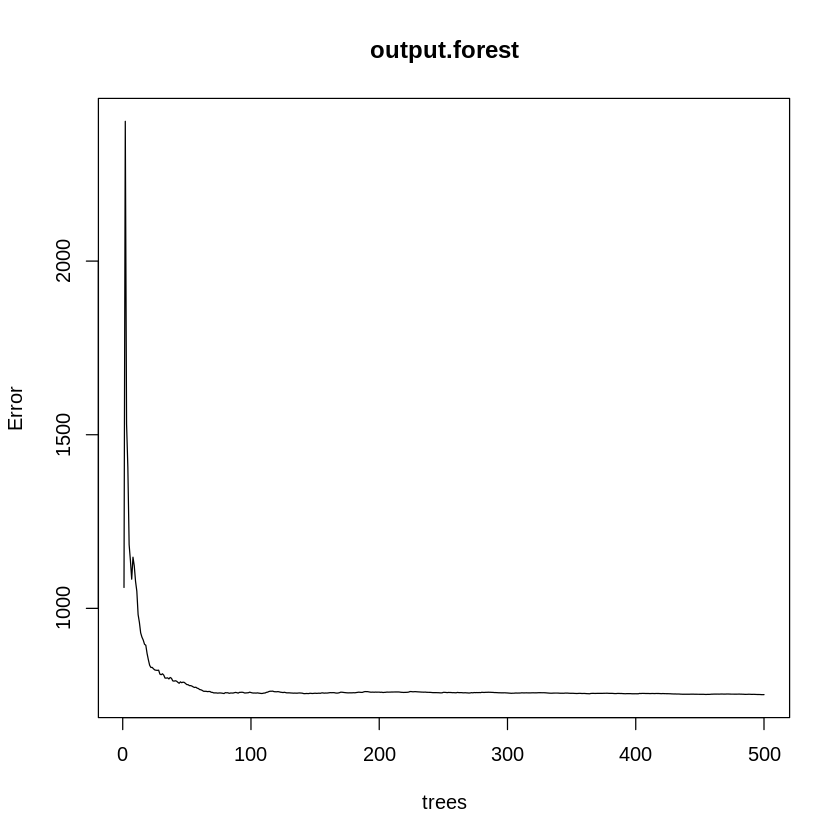

In [ ]:
plot(output.forest)

In [ ]:
set.seed(9991)

In [ ]:
rf <- randomForest(df)
print(rf)


Call:
 randomForest(x = mc) 
               Type of random forest: unsupervised
                     Number of trees: 500
No. of variables tried at each split: 5



In [ ]:
rf <- randomForest(lhcdata)
print(rf)

In [ ]:
df.rf <- randomForest(Lambda_b0_MM_F ~ Lambda_b0_DIRA_OWNPV_F+Lambda_c_MM_F+DeltaM_F, data=test_df, importance=TRUE,proximity=TRUE)
print(df.rf)
## Look at variable importance:
round(importance(df.rf), 2)
## Do MDS on 1 - proximity:
df.mds <- cmdscale(1 - df.rf$proximity, eig=TRUE)
op <- par(pty="s")
pairs(cbind(df[,5:12], df.mds$points), cex=0.6, gap=0,col=c("red", "blue", "yellow")[as.numeric(mc$Lambda_b0_MM_F)],main="Data: Predictors and MDS of Proximity Based on RandomForest")
par(op)
print(df.mds$GOF)

ERROR: ignored

In [ ]:
df.rf <- randomForest(tagg ~ ., data=dft, importance=TRUE,proximity=TRUE)

ERROR: ignored

In [ ]:
summary(dft)

In [ ]:
randomForest(formula = dft.tagg ~., data= dfk, proximity=TRUE)

In [ ]:
df.rf <- randomForest(dft.tagg ~., data= dfk, importance=TRUE,proximity=TRUE)
print(df.rf)
## Look at variable importance:
round(importance(df.rf), 2)
## Do MDS on 1 - proximity:
df.mds <- cmdscale(1 - df.rf$proximity, eig=TRUE)
op <- par(pty="s")
pairs(cbind(dfk[, 2:5], df.mds$points), cex=0.6, gap=0,col=c("red", "blue", "yellow")[as.numeric(dfk$dft.tagg)],main="Data: Predictors and MDS of Proximity Based on RandomForest")
par(op)
print(df.mds$GOF)

In [ ]:
df.rf <- randomForest(dft.tagg ~., data= dfk, importance=TRUE,proximity=TRUE)
print(df.rf)
## Look at variable importance:
round(importance(df.rf), 2)
## Do MDS on 1 - proximity:
df.mds <- cmdscale(1 - df.rf$proximity, eig=TRUE)
op <- par(pty="s")
pairs(cbind(dfk[, 2:5], df.mds$points), cex=0.6, gap=0,col=c("red", "blue", "green")[as.numeric(dfk$dft.tagg)],main="Data: Predictors and MDS of Proximity Based on RandomForest")
par(op)
print(df.mds$GOF)

In [ ]:
print("++++++++++++++++===============PROMO++++++++++++++++===============")

# "Promotion"
As the aim of this paper is study the rare decay of $\Lambda_b^0  \rightarrow \Lambda_c^{*+} \pi^- \pi^+ \pi^- $, and the contribution of this decay is very low, moreover, it has not monitored yet or it might be considered as a ghost, plus its Branching fraction is insignificant, then it is feasible to exploit package 'evtree'[<sup>1</sup>](#fn1) for classifying the signal/background where background like as signal and the signal could be a noise!
This package was published by Thomas Grubinger et al. at 2019-05-26. This package could be executed rare decays in R same as tmva package for Root data analysis framework.


<span id="fn1"> https://cran.r-project.org/web/packages/evtree/evtree.pdf</span>

### MC

In [ ]:
summary(Lambdabraredecay)
suppressWarnings(RNGversion("3.5.0"))
set.seed(444)
lmbdec <- evtree(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ . , data = Lambdabraredecay )
lmbdec
table(predict(lmbdec), Lambdabraredecay$Lambda_b0_MM_F, Lambdabraredecay$Lambda_b0_DIRA_OWNPV_F, Lambdabraredecay$Lambda_c_MM_F, Lambdabraredecay$DeltaM_F)
plot(lmbdec)

 Lambda_b0_MM_F Lambda_b0_DIRA_OWNPV_F Lambda_c_MM_F     DeltaM_F    
 Min.   :3125   Min.   :1              Min.   :2260   Min.   :271.3  
 1st Qu.:3895   1st Qu.:1              1st Qu.:2277   1st Qu.:399.3  
 Median :4241   Median :1              Median :2285   Median :457.1  
 Mean   :4382   Mean   :1              Mean   :2285   Mean   :447.8  
 3rd Qu.:4726   3rd Qu.:1              3rd Qu.:2292   3rd Qu.:502.2  
 Max.   :8119   Max.   :1              Max.   :2310   Max.   :567.7  
 lcDecVerChi2_F    lcstarDecVerChi2_F lbDecVerChi2_F    tau_pion0_ProbNNpi_F
 Min.   :0.01857   Min.   :0.01857    Min.   :0.01036   Min.   :0.4000      
 1st Qu.:0.15115   1st Qu.:0.15545    1st Qu.:0.08979   1st Qu.:0.8588      
 Median :0.39439   Median :0.39645    Median :0.27546   Median :0.9597      
 Mean   :0.43170   Mean   :0.43341    Mean   :0.35728   Mean   :0.8941      
 3rd Qu.:0.69242   3rd Qu.:0.69078    3rd Qu.:0.59093   3rd Qu.:0.9900      
 Max.   :1.00000   Max.   :1.00000    Max.   :0.

In [ ]:
summary(mc)

       X           lcstar_MM_F   Lambda_c_MM_F  Lambda_b0_MM_F lc_p_ProbNNp_F  
 Min.   :   0.0   Min.   :2599   Min.   :2261   Min.   :5043   Min.   :0.6017  
 1st Qu.: 372.2   1st Qu.:2624   1st Qu.:2283   1st Qu.:5611   1st Qu.:0.9596  
 Median : 744.5   Median :2629   Median :2287   Median :5621   Median :0.9921  
 Mean   : 744.5   Mean   :2629   Mean   :2287   Mean   :5619   Mean   :0.9550  
 3rd Qu.:1116.8   3rd Qu.:2632   3rd Qu.:2291   3rd Qu.:5629   3rd Qu.:0.9987  
 Max.   :1489.0   Max.   :2658   Max.   :2310   Max.   :5819   Max.   :0.9999  
 lcZDecLSigma_F    lcstarZDecLSigma_F  lcDecTime_F       lcstarDecTime_F    
 Min.   :-2.7962   Min.   :-3.40844   Min.   :-0.73256   Min.   :-2.529687  
 1st Qu.: 0.8108   1st Qu.:-0.59041   1st Qu.: 0.05942   1st Qu.:-0.136689  
 Median : 2.1974   Median : 0.02745   Median : 0.14998   Median : 0.007650  
 Mean   : 3.1521   Mean   : 0.07896   Mean   : 0.19716   Mean   : 0.007729  
 3rd Qu.: 4.3465   3rd Qu.: 0.74491   3rd Qu.: 0.27850 

In [ ]:
mc <- read.csv("MC_signal.csv")
str(mc)
length(mc)
head(mc)

'data.frame':	1490 obs. of  29 variables:
 $ X                         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ lcstar_MM_F               : num  2627 2628 2633 2643 2623 ...
 $ Lambda_c_MM_F             : num  2285 2283 2292 2302 2281 ...
 $ Lambda_b0_MM_F            : num  5623 5612 5616 5646 5611 ...
 $ lc_p_ProbNNp_F            : num  0.992 0.888 0.999 0.896 0.826 ...
 $ lcZDecLSigma_F            : num  0.409 1.375 4.896 0.418 1.331 ...
 $ lcstarZDecLSigma_F        : num  0.805 1.1153 -0.0737 -0.4422 -0.2064 ...
 $ lcDecTime_F               : num  0.0499 0.093 0.403 0.0292 0.1183 ...
 $ lcstarDecTime_F           : num  0.3398 0.1569 -0.0139 -0.1831 -0.069 ...
 $ lbDecTime_F               : num  2.26 1.79 1.75 3.68 3.02 ...
 $ lcDecVerChi2_F            : num  0.214 0.358 0.7071 0.9974 0.0623 ...
 $ lcstarDecVerChi2_F        : num  0.1127 0.5803 0.3356 0.0922 0.7364 ...
 $ lbDecVerChi2_F            : num  0.0698 0.3348 0.5924 0.2166 0.8929 ...
 $ Lambda_b0_DIRA_OWNPV_F    : num  1 1 1 1 1 ..

[1] 29

X lcstar_MM_F Lambda_c_MM_F Lambda_b0_MM_F lc_p_ProbNNp_F lcZDecLSigma_F
1 0 2626.854    2284.956      5622.924       0.9917341       0.4086872    
2 1 2627.802    2283.068      5612.167       0.8882393       1.3747380    
3 2 2633.442    2291.627      5616.046       0.9993977       4.8963213    
4 3 2642.915    2301.805      5646.397       0.8957078       0.4182040    
5 4 2622.908    2281.427      5611.077       0.8264728       1.3313930    
6 5 2621.799    2286.452      5620.596       0.9926847      -0.8735903    
  lcstarZDecLSigma_F lcDecTime_F lcstarDecTime_F lbDecTime_F ⋯ lcstar_BKGCAT_F
1  0.80495083         0.04987412  0.33979440     2.258424    ⋯ 0              
2  1.11527290         0.09303513  0.15686140     1.785060    ⋯ 0              
3 -0.07374316         0.40303950 -0.01392241     1.750813    ⋯ 0              
4 -0.44215745         0.02921662 -0.18312243     3.682759    ⋯ 0              
5 -0.20637804         0.11827911 -0.06902430     3.023738    ⋯ 0              
6 -2.41487550        -0.05361218 -0.43392980     1.978806    ⋯ 0              
  Lambda_c_BKGCAT_F tau_pion0_ProbNNpi_F tau_pion1_ProbNNpi_F
1 0                 0.9960517            0.9982353           
2 0                 0.9691991            0.8585599           
3 0                 0.8418677            0.9978477           
4 0                 0.9889790            0.9975429           
5 0                 0.7840963            0.9829828           
6 0                 0.9668434            0.9242030           
  tau_pion2_ProbNNpi_F lcstar_pim_ProbNNpi_F lcstar_pip_ProbNNpi_F
1 0.8162878            0.8929133             0.9908003            
2 0.9417674            0.8134506             0.8915913            
3 0.9980465            0.9457685             0.9957380            
4 0.9777250            0.8667298             0.9707277            
5 0.9363627            0.9700539             0.9744959            
6 0.9972259            0.9922459             0.9993781            
  Lambda_b0_ENDVERTEX_CHI2_F Lambda_c_ENDVERTEX_CHI2_F lcstar_ENDVERTEX_CHI2_F
1 10.199161                  4.48128100                5.9778357              
2  5.716545                  3.22633100                1.9619825              
3  3.706151                  1.39345610                3.3880040              
4  7.054080                  0.04634352                6.4361763              
5  1.668398                  7.32164340                1.2692643              
6  7.218605                  2.24006990                0.8458111

In [ ]:
MC <- mc %>% select(-X) %>% drop_na()
MC

lcstar_MM_F Lambda_c_MM_F Lambda_b0_MM_F lc_p_ProbNNp_F lcZDecLSigma_F
1    2626.854    2284.956      5622.924       0.9917341       0.40868717   
2    2627.802    2283.068      5612.167       0.8882393       1.37473800   
3    2633.442    2291.627      5616.046       0.9993977       4.89632130   
4    2642.915    2301.805      5646.397       0.8957078       0.41820398   
5    2622.908    2281.427      5611.077       0.8264728       1.33139300   
6    2621.799    2286.452      5620.596       0.9926847      -0.87359035   
7    2633.752    2292.133      5631.278       0.9998189       7.27342650   
8    2618.666    2279.865      5604.264       0.9928729       1.42187450   
9    2622.643    2283.496      5610.208       0.9999013       6.92821800   
10   2626.097    2283.652      5621.746       0.9689334       0.42639583   
11   2636.364    2294.166      5631.855       0.6329386       5.64936600   
12   2626.407    2286.896      5627.645       0.9902087       3.82006960   
13   2627.606    2287.422      5618.892       0.8458005      13.92110700   
14   2633.644    2292.339      5630.185       0.9874167       6.01767540   
15   2628.740    2286.074      5614.960       0.9968805      11.28697500   
16   2633.040    2288.180      5628.792       0.9967936       4.31030750   
17   2623.601    2279.895      5609.347       0.9971652       1.88463910   
18   2626.214    2284.657      5625.520       0.9661064      -1.52430010   
19   2633.104    2298.758      5622.241       0.9781937       3.08721200   
20   2622.333    2291.379      5606.616       0.9937553       0.69564980   
21   2617.862    2277.564      5603.439       0.6568693      -0.06711391   
22   2621.673    2277.671      5619.521       0.9997976      -0.91246630   
23   2636.457    2294.771      5645.582       0.7906193       0.42342708   
24   2627.944    2288.322      5619.412       0.6470486       8.59447500   
25   2627.915    2285.422      5607.987       0.9997674       6.57416100   
26   2621.512    2278.751      5599.928       0.9998551      -0.85885900   
27   2636.082    2294.183      5622.429       0.9972211       4.14897630   
28   2632.979    2291.120      5625.628       0.9962320       0.67363660   
29   2624.858    2287.099      5605.912       0.7583655       1.73948490   
30   2621.297    2280.140      5630.134       0.9926306      -0.02768985   
⋮    ⋮           ⋮             ⋮              ⋮              ⋮             
1461 2647.637    2297.957      5644.090       0.9801602       2.21453740   
1462 2630.111    2288.634      5630.244       0.9998122       2.99341580   
1463 2626.928    2282.649      5619.801       0.9991115      -0.50457376   
1464 2618.250    2276.949      5612.956       0.9988496       0.35822225   
1465 2638.328    2297.079      5634.942       0.9999126       2.24270820   
1466 2625.206    2282.178      5598.708       0.9999111       5.71529400   
1467 2623.902    2291.092      5615.294       0.7326927       1.45903110   
1468 2613.491    2273.333      5603.602       0.9953608      10.62614800   
1469 2631.091    2289.422      5615.892       0.8068633       1.60636480   
1470 2622.700    2280.177      5523.966       0.7794125       0.04169423   
1471 2634.210    2293.231      5644.069       0.9790184       1.56736970   
1472 2637.098    2295.384      5632.336       0.9119179       1.44849190   
1473 2618.544    2284.510      5576.652       0.9998835       2.52109240   
1474 2627.223    2286.960      5615.513       0.9997994       1.96968130   
1475 2627.233    2286.640      5611.229       0.9991600      20.42701100   
1476 2622.452    2281.914      5603.486       0.9963517       2.08435700   
1477 2626.703    2289.768      5625.336       0.9999147       3.52155830   
1478 2631.142    2287.678      5562.306       0.9653023       4.89761160   
1479 2631.034    2291.015      5627.931       0.9975903       1.70491550   
1480 2623.950    2281.058      5608.516       0.7474790       2.70731600   
1481 2626.054    2284.840      5625.215       0.99823

In [ ]:
mcdtt <- evtree(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ . , data = MC )
table(predict(mcdtt), MC$Lambda_b0_MM_F, MC$Lambda_b0_DIRA_OWNPV_F, MC$Lambda_c_MM_F, MC$DeltaM_F)
plot(mcdtt)

In [ ]:
PREDICT <- as.data.frame(table(predict(mgtt), MC$Lambda_b0_MM_F, MC$Lambda_b0_DIRA_OWNPV_F))

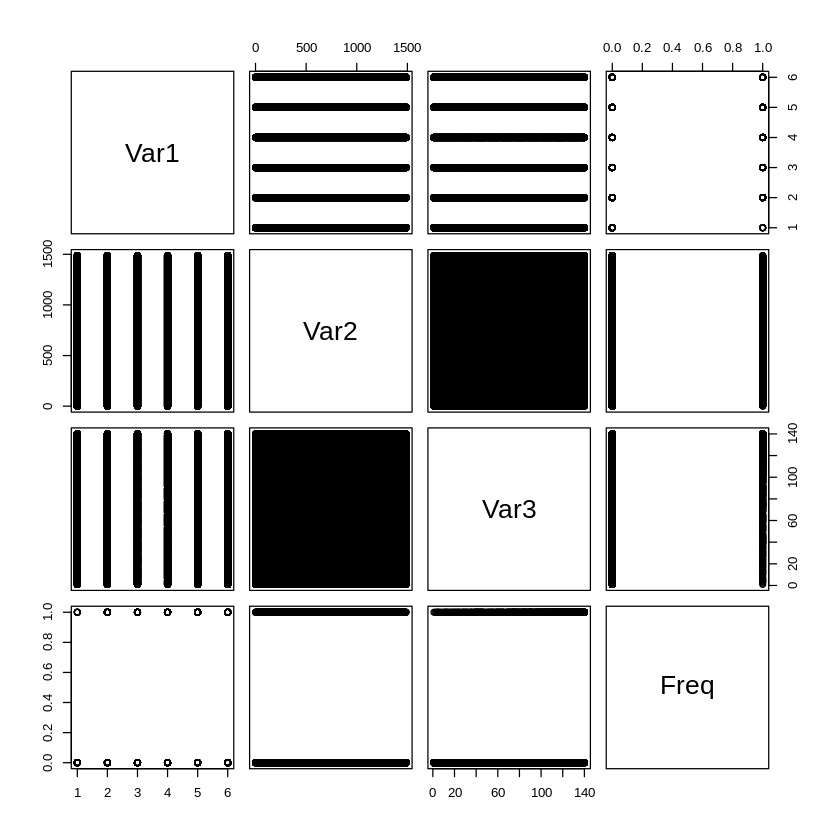

In [ ]:
plot(PREDICT)

In [ ]:
mgtt


Model formula:
Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ 
    lcstar_MM_F + lc_p_ProbNNp_F + lcZDecLSigma_F + lcstarZDecLSigma_F + 
        lcDecTime_F + lcstarDecTime_F + lbDecTime_F + lcDecVerChi2_F + 
        lcstarDecVerChi2_F + lbDecVerChi2_F + pair_lcstar_F + 
        pair0_3pi_F + pair1_3pi_F + Lambda_b0_BKGCAT_F + lcstar_BKGCAT_F + 
        Lambda_c_BKGCAT_F + tau_pion0_ProbNNpi_F + tau_pion1_ProbNNpi_F + 
        tau_pion2_ProbNNpi_F + lcstar_pim_ProbNNpi_F + lcstar_pip_ProbNNpi_F + 
        Lambda_b0_ENDVERTEX_CHI2_F + Lambda_c_ENDVERTEX_CHI2_F + 
        lcstar_ENDVERTEX_CHI2_F

Fitted party:
[1] root
|   [2] tau_pion2_ProbNNpi_F < 0.63322
|   |   [3] tau_pion0_ProbNNpi_F < 0.99739: 8235.936 (n = 33, err = 44143.7)
|   |   [4] tau_pion0_ProbNNpi_F >= 0.99739: 8116.662 (n = 7, err = 310075.3)
|   [5] tau_pion2_ProbNNpi_F >= 0.63322
|   |   [6] lcstar_MM_F < 2624.027: 8232.189 (n = 333, err = 137495.1)
|   |   [7] lcstar_MM_F >= 2624.027
|   |   |  

In [ ]:
table(predict(mgtt), MC$Lambda_b0_MM_F)

                  
                   5043.168 5305.349 5315.1245 5393.37 5430.7676 5501.9478
  8116.66179353286        1        0         1       0         0         0
  8232.1890261606         0        0         0       0         0         0
  8235.93596359364        0        0         0       0         1         0
  8246.21994526457        0        1         0       1         0         0
  8261.31900197009        0        0         0       0         0         1
  8281.59567795885        0        0         0       0         0         0
                  
                   5506.7793 5517.803 5520.831 5523.9663 5526.171 5548.4795
  8116.66179353286         0        0        0         0        0         0
  8232.1890261606          0        0        0         1        0         1
  8235.93596359364         0        0        0         0        0         0
  8246.21994526457         1        1        1         0        0         0
  8261.31900197009         0        0        0         0 

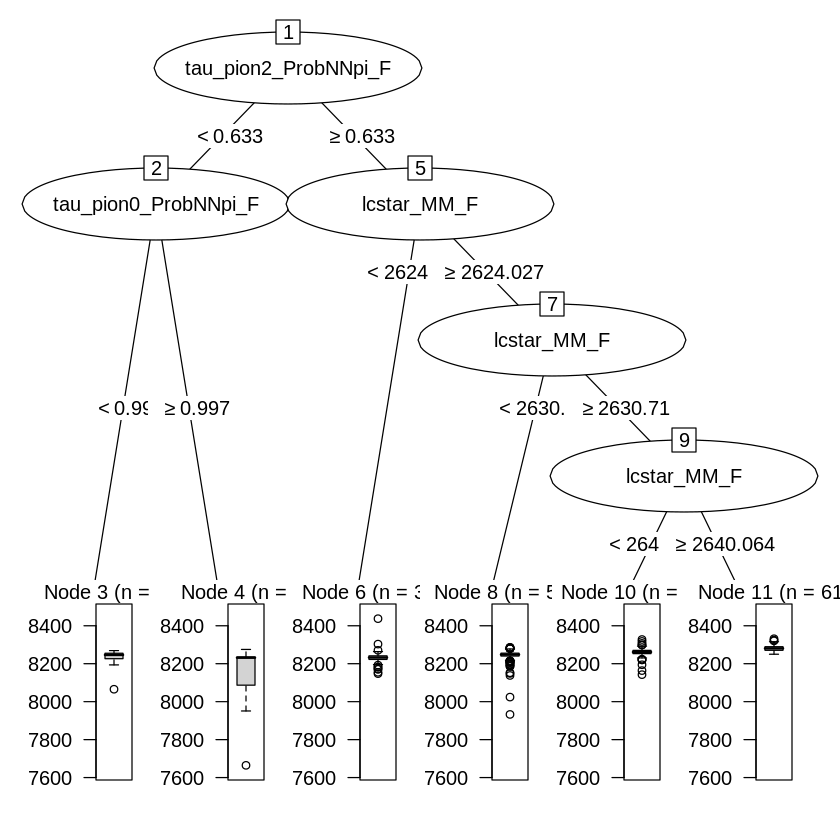

In [ ]:
plot(mgtt)

In [ ]:
evtree.control(minbucket = 7L, minsplit = 20L, maxdepth = 9L, 
  niterations = 10000L, ntrees = 100L, alpha = 1,
  operatorprob = (PREDICT) )

$minbucket
[1] 7

$minsplit
[1] 20

$maxdepth
[1] 9

$niterations
[1] 10000

$ntrees
[1] 100

$alpha
[1] 1

$operatorprob
pmutatemajor pmutateminor   pcrossover       psplit       pprune        Var11 
1.957428e-08 1.957428e-08 1.957428e-08 1.957428e-08 1.957428e-08 9.787140e-08 
       Var12        Var13        Var14        Var15        Var16        Var17 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
       Var18        Var19       Var110       Var111       Var112       Var113 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var114       Var115       Var116       Var117       Var118       Var119 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var120       Var121       Var122       Var123       Var124       Var125 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var126       Var127       Var128       Var129       Var130       Var131 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var132       Var133       Var134       Var135       Var136       Var137 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var138       Var139       Var140       Var141       Var142       Var143 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var144       Var145       Var146       Var147       Var148       Var149 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var150       Var151       Var152       Var153       Var154       Var155 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var156       Var157       Var158       Var159       Var160       Var161 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var162       Var163       Var164       Var165       Var166       Var167 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var168       Var169       Var170       Var171       Var172       Var173 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var174       Var175       Var176       Var177       Var178       Var179 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var180       Var181       Var182       Var183       Var184       Var185 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var186       Var187       Var188       Var189       Var190       Var191 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var192       Var193       Var194       Var195       Var196       Var197 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
      Var198       Var199      Var1100      Var1101      Var1102      Var1103 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1104      Var1105      Var1106      Var1107      Var1108      Var1109 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1110      Var1111      Var1112      Var1113      Var1114      Var1115 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1116      Var1117      Var1118      Var1119      Var1120      Var1121 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1122      Var1123      Var1124      Var1125      Var1126      Var1127 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1128      Var1129      Var1130      Var1131      Var1132      Var1133 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1134      Var1135      Var1136      Var1137      Var1138      Var1139 
1.957428e-07 2.936142e-07 3.914856e-07 4.893570e-07 5.872284e-07 9.787140e-08 
     Var1140      Var1141      Var1142      Var1143      Var1144      Var1145 
1.95742

In [ ]:
controlTree <- evtree.control(minbucket = 20L, minsplit = 30L, maxdepth = 19L, 
  niterations = 10000L, ntrees = 60L, alpha = 1,
  operatorprob = list(pmutatemajor = 0.2, pmutateminor = 0.2,
    pcrossover = 0.2, psplit = 0.2, pprune = 0.2),
  seed = 666)

Warning message in evtree.control(minbucket = 20L, minsplit = 30L, maxdepth = 19L, :
“parameter "minsplit" must be at least twice as large as "minbucket", changed”
Warning message in evtree.control(minbucket = 20L, minsplit = 30L, maxdepth = 19L, :
“computations may take extremely long for "maxdepth" > 15 (or even be infeasible)”


In [ ]:
mcdtt <- evtree(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ . , data = MC, control = controlTree)

In [ ]:
mcdtt


Model formula:
Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ 
    lcstar_MM_F + lc_p_ProbNNp_F + lcZDecLSigma_F + lcstarZDecLSigma_F + 
        lcDecTime_F + lcstarDecTime_F + lbDecTime_F + lcDecVerChi2_F + 
        lcstarDecVerChi2_F + lbDecVerChi2_F + pair_lcstar_F + 
        pair0_3pi_F + pair1_3pi_F + Lambda_b0_BKGCAT_F + lcstar_BKGCAT_F + 
        Lambda_c_BKGCAT_F + tau_pion0_ProbNNpi_F + tau_pion1_ProbNNpi_F + 
        tau_pion2_ProbNNpi_F + lcstar_pim_ProbNNpi_F + lcstar_pip_ProbNNpi_F + 
        Lambda_b0_ENDVERTEX_CHI2_F + Lambda_c_ENDVERTEX_CHI2_F + 
        lcstar_ENDVERTEX_CHI2_F

Fitted party:
[1] root
|   [2] tau_pion2_ProbNNpi_F < 0.63505
|   |   [3] lcZDecLSigma_F < 1.68865: 8246.387 (n = 21, err = 8040.4)
|   |   [4] lcZDecLSigma_F >= 1.68865: 8184.182 (n = 20, err = 390271.8)
|   [5] tau_pion2_ProbNNpi_F >= 0.63505
|   |   [6] lcstar_MM_F < 2630.7104
|   |   |   [7] lcstar_MM_F < 2624.027: 8232.189 (n = 333, err = 137495.1)
|   |   |   [8] lcs

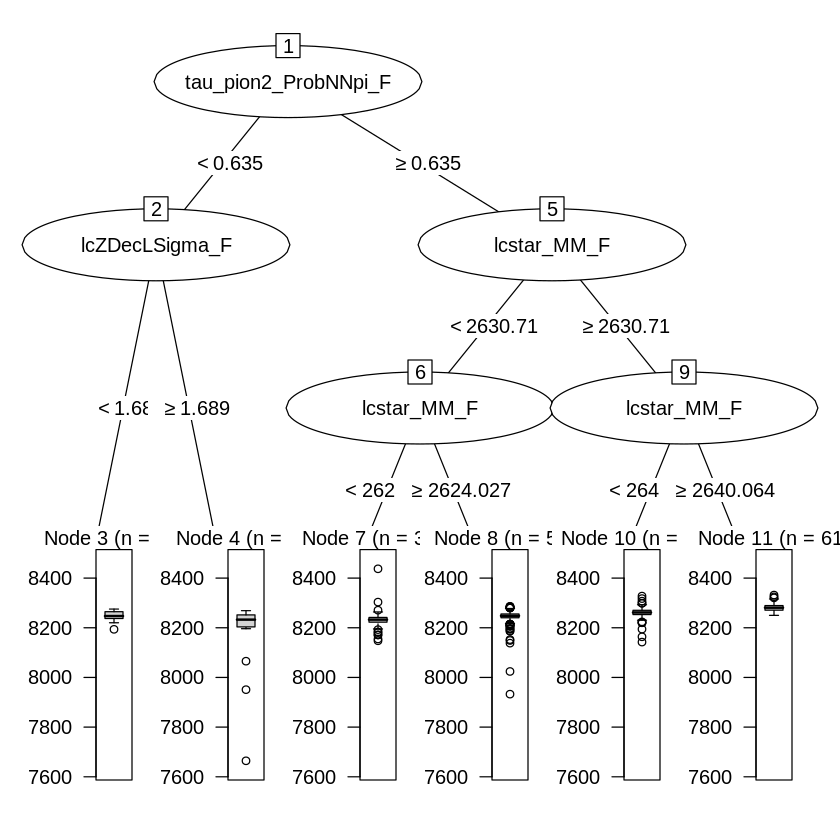

In [ ]:
plot(mcdtt)

Warning message in evtree.control(minbucket = 16L, minsplit = 25L, maxdepth = 13L, :
“parameter "minsplit" must be at least twice as large as "minbucket", changed”


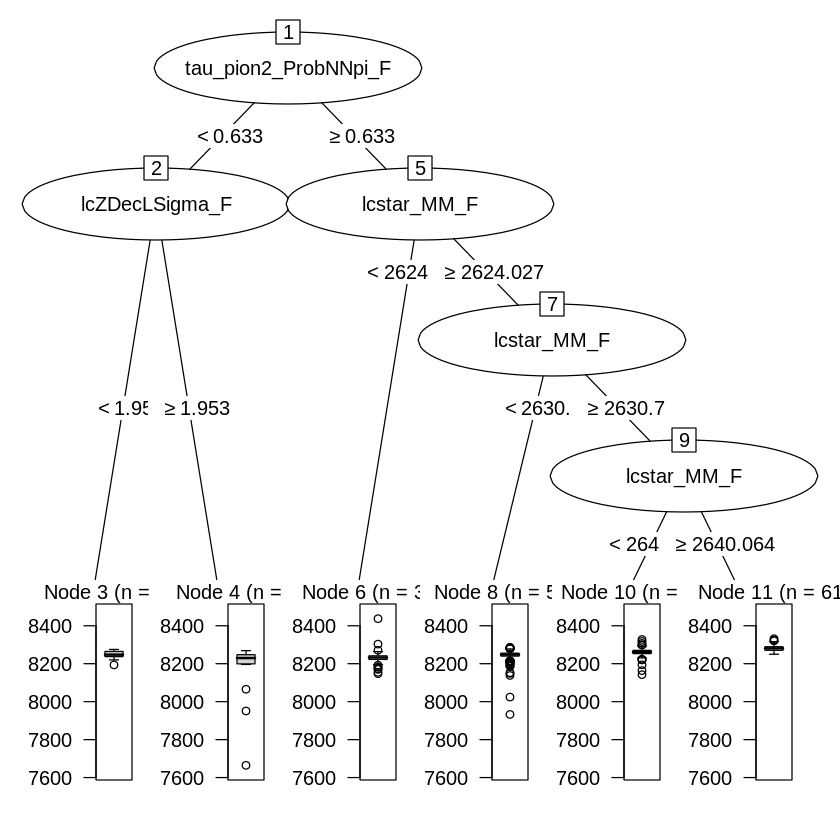

In [ ]:
controlTree <- evtree.control(minbucket = 16L, minsplit = 25L, maxdepth = 13L, 
  niterations = 100000L, ntrees = 60L, alpha = 1,
  operatorprob = list(pmutatemajor = 0.25, pmutateminor = 0.25,
    pcrossover = 0.26, psplit = 0.3, pprune = 0.3),
  seed = 666)
mcdtt <- evtree(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ . , data = MC, control = controlTree)
plot(mcdtt)

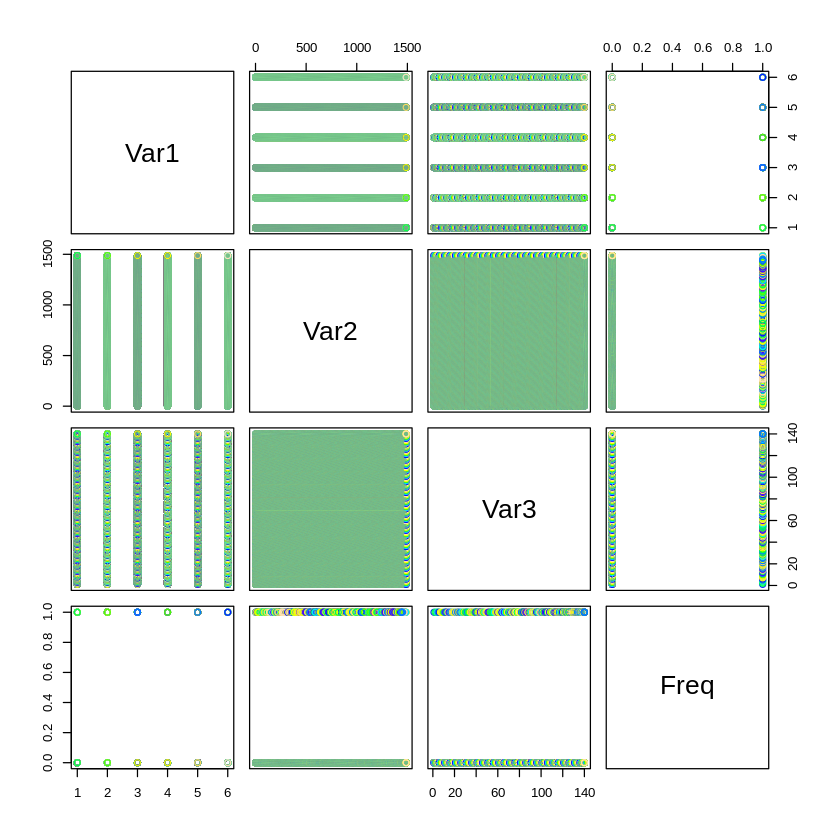

In [ ]:
PREDICT <- as.data.frame(table(predict(mcdtt), MC$Lambda_b0_MM_F, MC$Lambda_b0_DIRA_OWNPV_F))
plot(PREDICT, col = topo.colors(10))

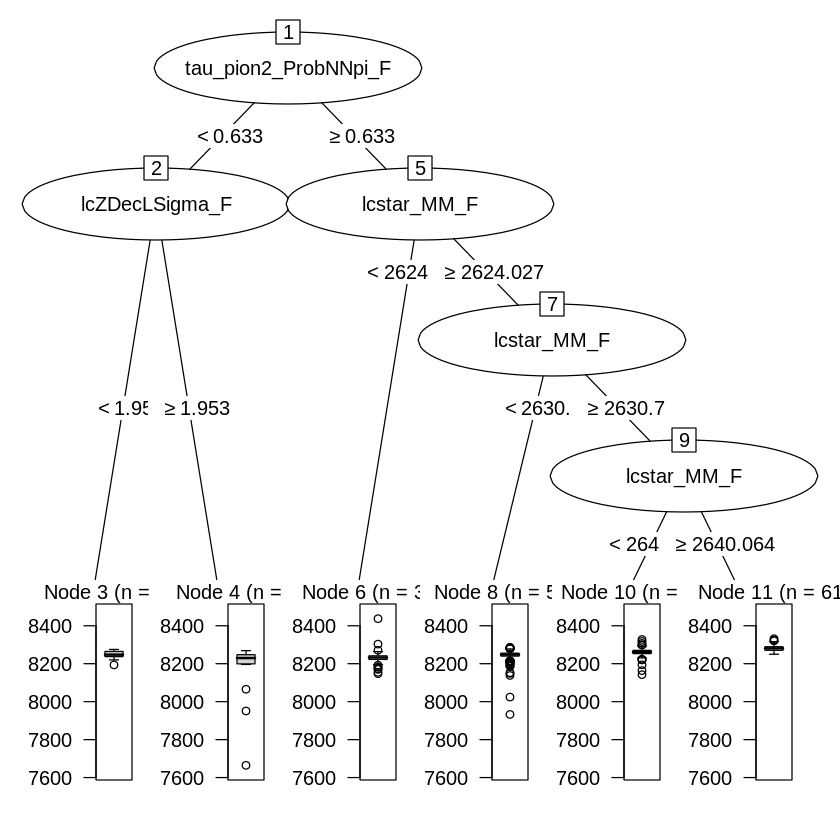

In [ ]:
plot(mcdtt)

In [ ]:
Lambdabraredecay <- df[5000:10000,]

## Tuning of the whole data

In [ ]:
summary(Lambdabraredecay)
suppressWarnings(RNGversion("3.5.0"))
set.seed(777)
lmbdec <- evtree(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ . , data = Lambdabraredecay )
lmbdec


 Lambda_b0_MM_F Lambda_b0_DIRA_OWNPV_F Lambda_c_MM_F     DeltaM_F    
 Min.   :3208   Min.   :1              Min.   :2260   Min.   :285.4  
 1st Qu.:3896   1st Qu.:1              1st Qu.:2277   1st Qu.:413.6  
 Median :4227   Median :1              Median :2285   Median :466.5  
 Mean   :4360   Mean   :1              Mean   :2284   Mean   :457.3  
 3rd Qu.:4700   3rd Qu.:1              3rd Qu.:2291   3rd Qu.:506.0  
 Max.   :8110   Max.   :1              Max.   :2310   Max.   :564.2  
 lcDecVerChi2_F    lcstarDecVerChi2_F lbDecVerChi2_F   tau_pion0_ProbNNpi_F
 Min.   :0.01859   Min.   :0.01862    Min.   :0.0104   Min.   :0.4001      
 1st Qu.:0.14919   1st Qu.:0.16776    1st Qu.:0.0915   1st Qu.:0.8511      
 Median :0.39695   Median :0.40220    Median :0.2842   Median :0.9590      
 Mean   :0.43463   Mean   :0.43785    Mean   :0.3563   Mean   :0.8909      
 3rd Qu.:0.70083   3rd Qu.:0.69398    3rd Qu.:0.5772   3rd Qu.:0.9892      
 Max.   :0.99955   Max.   :0.99990    Max.   :0.9992  

Warning message in evtree(Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + :
“character variable tagg was converted to a factor”



Model formula:
Lambda_b0_MM_F + Lambda_b0_DIRA_OWNPV_F + Lambda_c_MM_F + DeltaM_F ~ 
    lcDecVerChi2_F + lcstarDecVerChi2_F + lbDecVerChi2_F + tau_pion0_ProbNNpi_F + 
        tau_pion1_ProbNNpi_F + tau_pion2_ProbNNpi_F + lcstar_pim_ProbNNpi_F + 
        lcstar_pip_ProbNNpi_F + tagg

Fitted party:
[1] root
|   [2] lbDecVerChi2_F < 0.04656: 7215.944 (n = 723, err = 347890427.6)
|   [3] lbDecVerChi2_F >= 0.04656: 7083.482 (n = 4278, err = 1813840651.3)

Number of inner nodes:    1
Number of terminal nodes: 2

                  
                   3207.8118 3235.1797 3266.55 3268.117 3268.5342 3269.659
  7083.48190922959         1         1       1        1         1        1
  7215.94374660599         0         0       0        0         0        0
                  
                   3277.3271 3282.3345 3282.7812 3283.5918 3290.3965 3301.28
  7083.48190922959         1         1         1         1         1       0
  7215.94374660599         0         0         0         0         0       1
                  
                   3303.2827 3304.5017 3304.5447 3310.8604 3316.9045 3324.2532
  7083.48190922959         1         0         1         1         1         1
  7215.94374660599         0         1         0         0         0         0
                  
                   3325.0386 3325.2073 3329.0383 3329.7756 3340.2146 3341.2793
  7083.48190922959         1         1         1         1         1         1
  7215.94374660599         0         0         0         0         0     

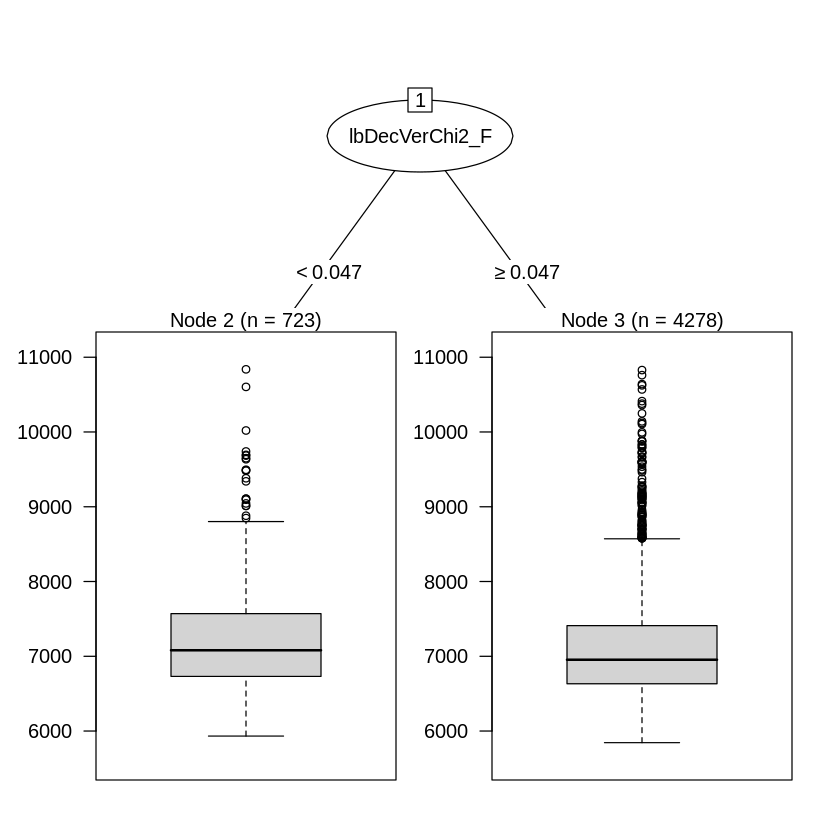

In [ ]:
table(predict(lmbdec), Lambdabraredecay$Lambda_b0_MM_F)
plot(lmbdec)

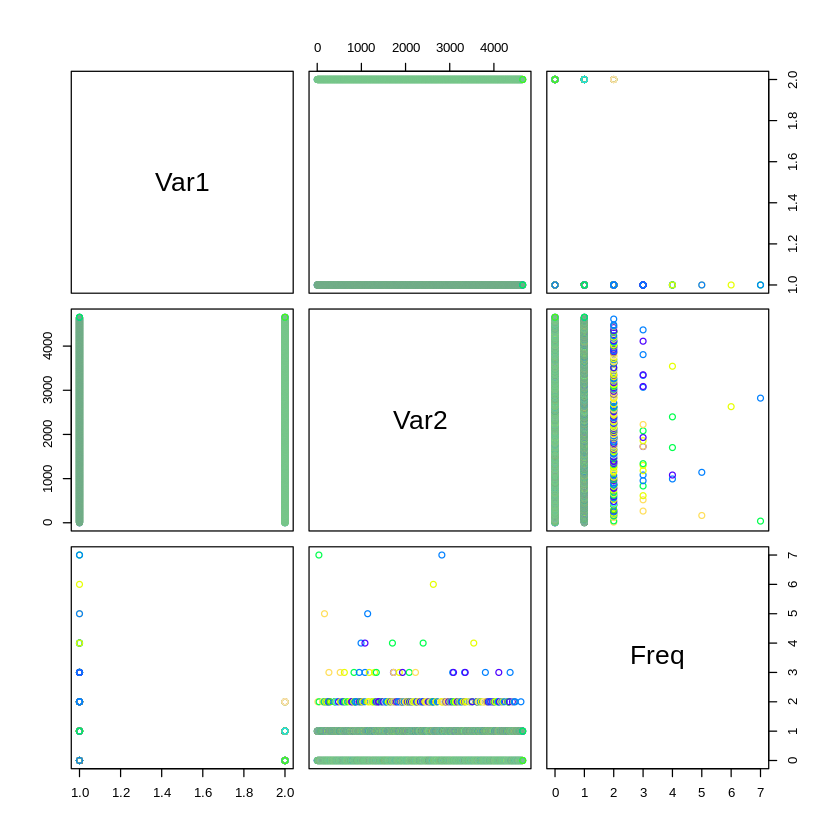

In [ ]:
PREDICT <- as.data.frame(table(predict(lmbdec), Lambdabraredecay$ Lambda_c_MM_F))
plot(PREDICT, col = topo.colors(10))

Warning message in evtree(DeltaM_F ~ ., data = Lambdabraredecay, control = controlTree):
“character variable tagg was converted to a factor”


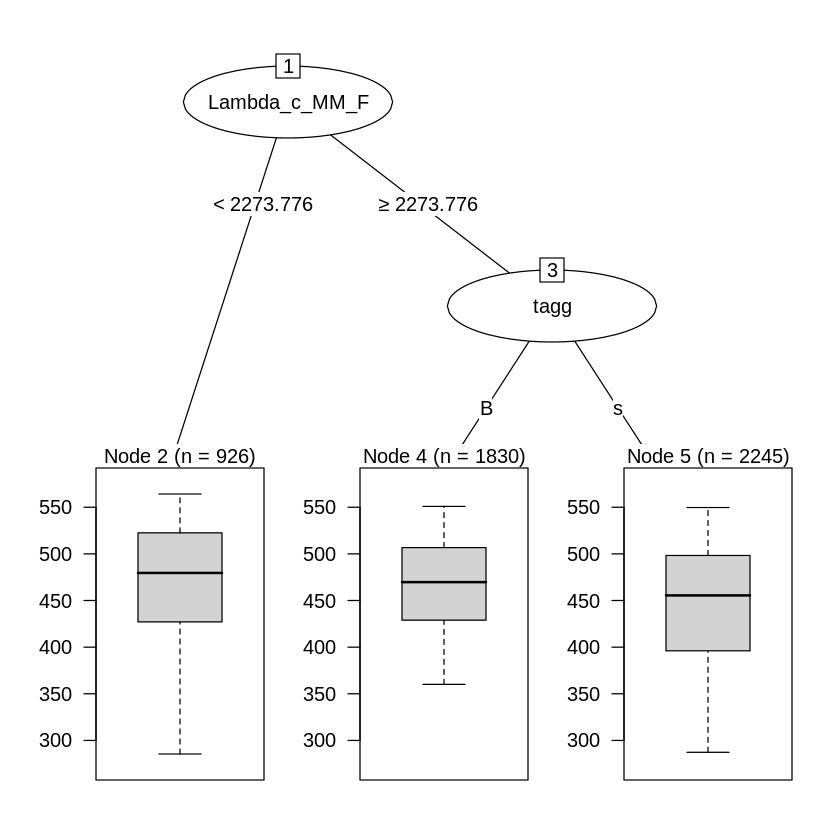

In [ ]:
controlTree <- evtree.control(minbucket = 11L, minsplit = 22L, maxdepth = 12L, 
  niterations = 1000L, ntrees = 60L, alpha = 1,
  operatorprob = list(pmutatemajor = 0.25, pmutateminor = 0.25,
    pcrossover = 0.26, psplit = 0.3, pprune = 0.3),
  seed = 666)
lmbdec <- evtree(DeltaM_F ~ . , data = Lambdabraredecay, control = controlTree)
plot(lmbdec)

In [ ]:
controlTree <- evtree.control(minbucket = 11L, minsplit = 22L, maxdepth = 12L, 
  niterations = 1000L, ntrees = 60L, alpha = 1,
  operatorprob = list(pmutatemajor = 0.25, pmutateminor = 0.25,
    pcrossover = 0.26, psplit = 0.3, pprune = 0.3),
  seed = 666)
lmbdec <- evtree(class ~  . , data = Lambdabraredecay, control = controlTree)
plot(lmbdec)

In [ ]:
table(predict(lmbdec), Lambdabraredecay$class)